# Malware Classification 

## Content

1. [Libraries](#1)
2. [Load Dataset](#2)
3. [Information about Dataset](#3)
    
    3.1. [General](#3.1)
    
    3.2. [Description of variables](#3.2)
    
    3.3. [Correlation between variables and Possible to be deleted](#3.3)
    
4. [Exploratory Data Analysis](#4)

    4.1. [Univarite Analysis and Some Visualizations](#4.1)
    
    4.2. [Bivarite Analysis and Some Visualizations](#4.2)
    
5. [Statistics](#5)
    
    5.1. [min/max](#5.1)
    
    5.2. [mean](#5.2)
    
    5.3. [variance](#5.3)
    
    5.4. [skewness](#5.4)
    
    5.5. [kurtosis](#5.5)
    
6. [Data Preprocessing](#6)

    6.1. [Encoding categorical variable](#6.1)
    
    6.2. [Test/Train Split](#6.2)
    
    6.3. [Scaling Dataset](#6.3)
    
7. [Data Modelling and Tuning](#7)

    7.1. [Logistic Regression](#7.1)
    
    7.2. [K-Nearest Neighbor](#7.2)
    
    7.3. [Gaussian Naive Bayes](#7.3)
    
    7.4. [Support Vector Machine](#7.4)
    
    7.5. [RBF SVC](#7.5)
    
    7.6. [Desicion Tree(CART)](#7.6)
    
    7.7. [Random Forests](#7.7)
    
    7.8. [Gradient Boosting Machines](#7.8)
    
    7.9. [XGBoost](#7.9)
    
    7.10. [LightGBM](#7.10)
    
    7.11. [CatBoost](#7.11)


8. [Results](#8)

<a id='1'></a><br>
## Libraries

In [22]:
#download 
#!pip install xgboost
#conda install -c conda-forge lightgbm
#!pip install catboost
#!pip install skompiler

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # about ignoring warnings


import pandas as pd # for dataset processing
import numpy as np # far dataset manipulation
import seaborn as sns # dataset visualization
from matplotlib import pyplot as plt # dataset visualization

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



import scipy.stats as stat # for statistical proseses
from sklearn.preprocessing import LabelEncoder # encoding categorical variable
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score # train/test split
from sklearn.preprocessing import StandardScaler # scaling dataset
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
from sklearn.metrics import roc_auc_score,roc_curve

<a id='2'></a><br>
## Load Dataset

In [3]:
# pd.set_option("display.max.columns", None)
malware = pd.read_csv('malware_dataset.csv')
df = malware.copy()

<a id='3'></a><br>
## Information about Dataset

<a id='3.1'></a><br>
### General

In [5]:
# top five variables
df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [5]:
# last five variables
df.tail()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
99995,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,995,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99996,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,996,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99997,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,997,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99998,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,998,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99999,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,999,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0


In [6]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

There are 100000 entries.

There are 35 variables in dataset.

* two of variables are objects 
* thirty-three of variables are int64.



In [7]:
df.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [8]:
# dimensionality of dataset
df.shape

(100000, 35)

In [9]:
# is there any null values?
df.isnull().values.any()

False

<a id='3.2'></a><br>
### Description of Variables

| Variables | Description |
| --- | --- | 
|milisecond | time|
|classification | malware/beign|
|state | flag of unrunable/runnable/stopped tasks.|
|usage_counter | task structure usage counter|
|prio| keeps the dynamic priority of a process|
|static_prio| static priority of a process|
|normal_prio| priority without taking RT-inheritance into account|
|policy| planning policy of the process|
|vm_pgoff| The offset of the area in the file, in pages.|
|vm_truncate_count| used to mark a vma as now dealt with|
|task_size| size of current task.|
|cached_hole_size| size of free address space hole.|
|free_area_cache | first address space hole|
|mm_users| address space users|
|map_count| number of memory areas|
|hiwater_rss| peak of resident set size|
|total_vm | total number of pages|
|shared_vm| number of shared pages.|
|exec_vm | number of executable pages.|
|reserved_vm| number of reserved pages.|
|nr_ptes| number of page table entries|
|end_data |end address of code component|
|last_interval| last interval time before thrashing|
|nvcsw | number of volunteer context switches.|
|nivcsw| number of in-volunteer context switches|
|min_flt| minör page faults|
|maj_flt| majör page faults|
|fs_excl_counter |  It holds file system exclusive resources.| 
|lock | The read-write synchronization lock used for file system access|
|utime| user time|
|stime| system time|
|gtime| guest time|
|cgtime| cumulative group time. Cumulative resource counter|
|signal_nvcsw| used as cumulative resource counter.|

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
millisecond,100000.0,4.995000e+02,288.676434,0.000000e+00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
state,100000.0,1.577683e+05,936172.583334,0.000000e+00,0.000000e+00,0.000000e+00,4.096000e+03,4.326605e+07
usage_counter,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
prio,100000.0,3.069706e+09,296306.144183,3.069190e+09,3.069446e+09,3.069698e+09,3.069957e+09,3.070222e+09
static_prio,100000.0,1.818390e+04,4609.792765,1.398800e+04,1.435200e+04,1.615900e+04,2.218200e+04,3.185500e+04
normal_prio,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
policy,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
vm_pgoff,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
vm_truncate_count,100000.0,1.531274e+04,3256.475008,9.695000e+03,1.264800e+04,1.524500e+04,1.766300e+04,2.715700e+04
task_size,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


<a id='3.3'></a><br>
### Correlation between variables and Possible to be deleted

In [10]:
# correlations of dataset's variables
df.corr()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
millisecond,1.000000e+00,-0.038708,NaN,4.125287e-18,0.091229,NaN,NaN,NaN,0.284907,NaN,...,0.240078,-0.046854,-0.108636,0.167288,NaN,0.249216,0.222714,0.208772,NaN,NaN
state,-3.870821e-02,1.000000,NaN,-5.297331e-03,0.040396,NaN,NaN,NaN,0.074936,NaN,...,-0.004851,-0.000722,0.013344,-0.011872,NaN,0.078280,0.024537,-0.024711,NaN,NaN
usage_counter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prio,4.125287e-18,-0.005297,NaN,1.000000e+00,-0.137493,NaN,NaN,NaN,-0.197176,NaN,...,0.042366,0.010503,0.060631,-0.010575,NaN,-0.115542,0.007504,0.049742,NaN,NaN
static_prio,9.122893e-02,0.040396,NaN,-1.374934e-01,1.000000,NaN,NaN,NaN,0.617350,NaN,...,0.065555,0.000217,-0.408907,0.107777,NaN,0.773214,0.245480,-0.053098,NaN,NaN
normal_prio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vm_pgoff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vm_truncate_count,2.849068e-01,0.074936,NaN,-1.971759e-01,0.617350,NaN,NaN,NaN,1.000000,NaN,...,0.337080,0.010717,-0.390934,0.273491,NaN,0.864216,0.609531,0.240905,NaN,NaN
task_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
max(df.corr())

'vm_truncate_count'

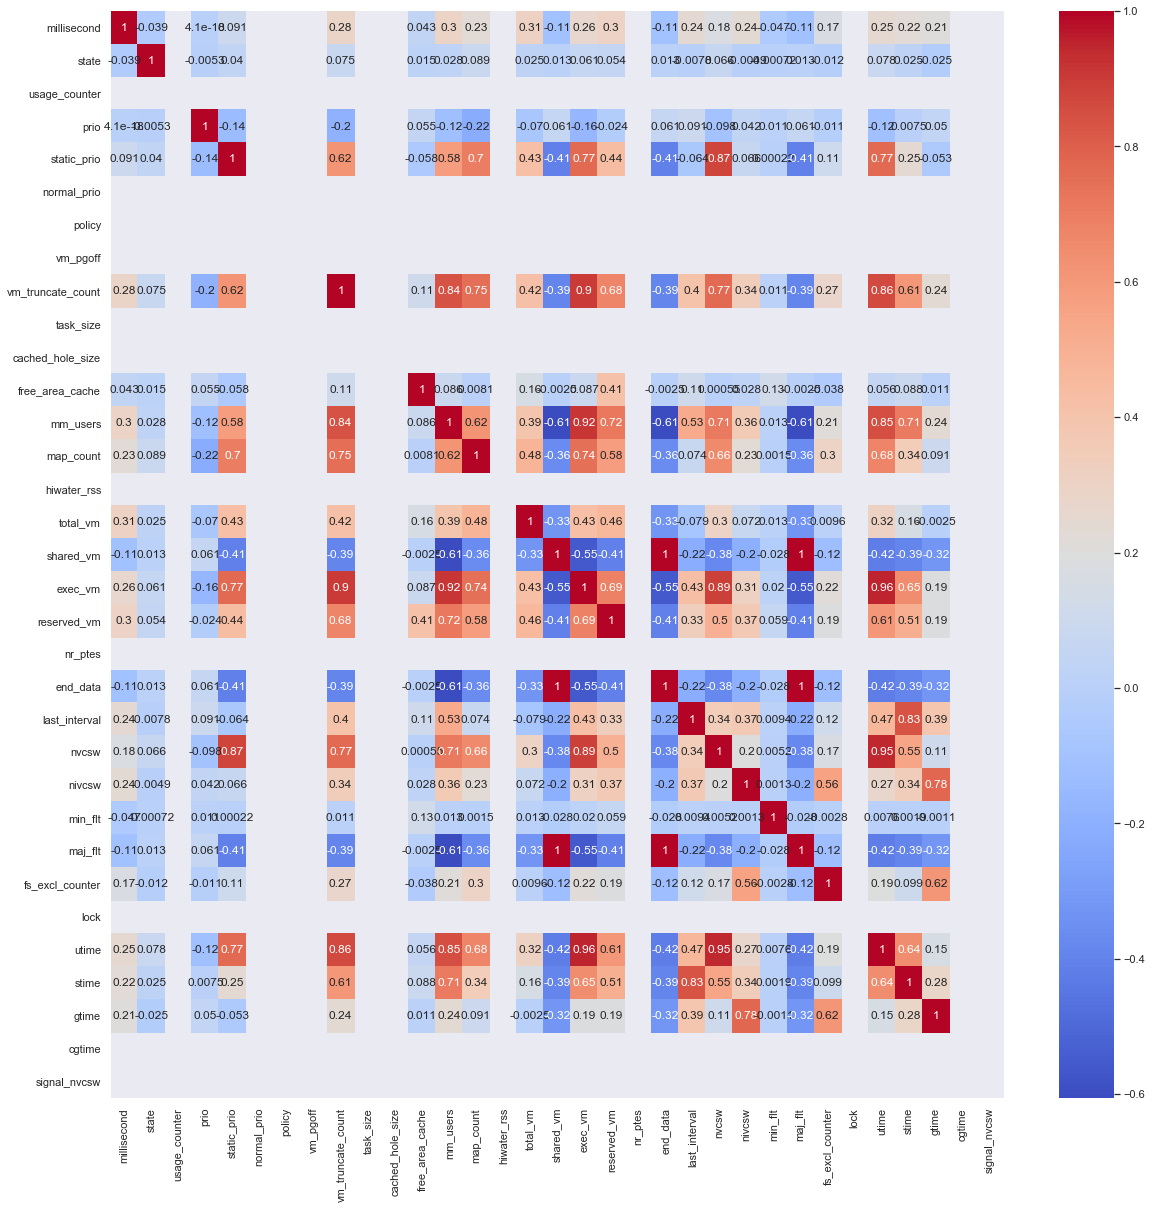

In [11]:
# correlations of variables
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.corr(),annot=True,cmap= 'coolwarm');

### Possible to be deleted

* usage_counter
* normal_prio
* policy
* vm_pgoff
* task_size
* cached_hole_size
* hiwater_rss
* nr_ptes
* lock
* cgtime
* signal_nvcsw

<a id='4'></a><br>
## Exploratory Data Analysis

<a id='4.1'></a><br>
### Univarite Analysis and Some Visualizations

#### hash 

Type of hash is object.

In [14]:
df.hash.value_counts()

30d6fb78a81325c38c8d4d48a43d4e9f5c0621436e781c76e8be7965b6c3c988    1000
com.ea.game.tetris2011_na.apk                                       1000
com.epocrates.apk                                                   1000
DOCECG2.doctor.apk                                                  1000
12fbe832590c8d44b1687b178450d49190c1a9d8e61c80a090f461168dd0bf8f    1000
                                                                    ... 
1824056efb105d20db233bfeb1f93ee69eeaff81b63eb8cd53d582d7330687ab    1000
com.bti.myGuitar.apk                                                1000
air.com.tensquaregames.letsfish.apk                                 1000
3ae3446d5d66804319cade2bab8236ec018aa1a20fd75215e0f1da3402ff3618    1000
116ae92ecfacb70146fe643d92878e522f71af393702f3b66d2135a06bcff57f    1000
Name: hash, Length: 100, dtype: int64

In [4]:
# Unique hash variable

for each in df.hash.unique():
    print(each+'\n')

42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0

com.kmcpesh.medicalskillsproceduresfree.apk

com.roidapp.photogrid.apk

5dd6c684ad85ec01c32172a38451f0b6f3b261dce3c335dbe099d87763fe7790

biz.mtoy.blockpuzzle.revolution.apk

35e61d9b00a30f757d9b96fe5e5e2c89a8ebaa6e5787eb4b7e3a4a4213c4ce97

air.com.freshplanet.games.MoviePop.apk

com.imangi.templerun2.apk

com.kvadgroup.photostudio.apk

com.vbsmojivy.mianzed.apk

3c722b32535e6e8ea1bbf8accdff73376cf2c3393d9325304ffc37c3213fdb4c

com.modernenglishstudio.HowToSpeak.apk

com.king.candycrushsodasaga.apk

com.google.zxing.client.android.apk

com.tyengl.vocab.apk

imoblife.toolbox.full.apk

com.tangram3D.AthleticsFree.apk

com.venticake.retrica.apk

com.microsoft.amp.apps.bingfinance.apk

com.androiddevelopermx.blogspot.organos3d.apk

com.microsoft.office.word.apk

com.ezmusicplayer.demo.apk

com.piriform.ccleaner.apk

com.ea.game.tetris2011_na.apk

com.miniclip.dudeperfect.apk

audio.mp3.music.player.apk

com.baiwang.instablen

In [16]:
# how many there are unique hash variables?
len(df.hash.unique())

100

In [17]:
pd.crosstab(df.hash,df.classification)

classification,benign,malware
hash,,
024b27972a6b3a1535510e9c0f154fb1a8e3a2afb25d5c30d2f6a9d23424d925,0,1000
025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2b78cf2ac52493cb460,0,1000
0602834d897fe3f3314586ae867aed63f3757be01b7f0354c8626519d8575453,0,1000
079277b8b6049c06806b79216901d0e9ff473bfe2c2454aa8a496515167eca40,0,1000
1117d14765e9169184cc931f7a417a460898e4b0d8f3c86562065fc82f5866ce,0,1000
...,...,...
com.venticake.retrica.apk,1000,0
com.zayaninfotech.english.grammar.apk,1000,0
com.zynga.wordsontour.apk,1000,0


#### classification

Type of classification is object. It need to encoding to numerical variables.

In [18]:
tab = pd.crosstab(index=df['classification'],columns='frekans')
tab

col_0,frekans
classification,
benign,50000
malware,50000


In [19]:
tab/tab.sum()

col_0,frekans
classification,
benign,0.5
malware,0.5


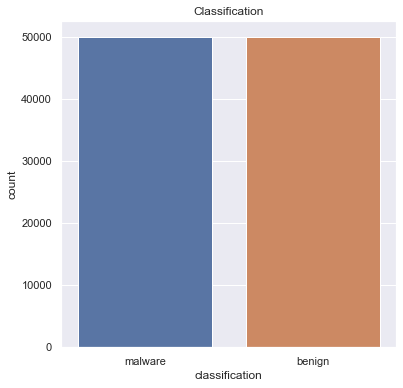

In [7]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x = 'classification', data = df)
plt.title('Classification')
plt.show()

In [5]:
df_new = df.drop(['hash'],axis=1)
df_new.head()

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
1,1,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
2,2,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
3,3,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
4,4,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0


In [14]:
columns = df_new.columns

### Visualizations

#### Histogram Visualization

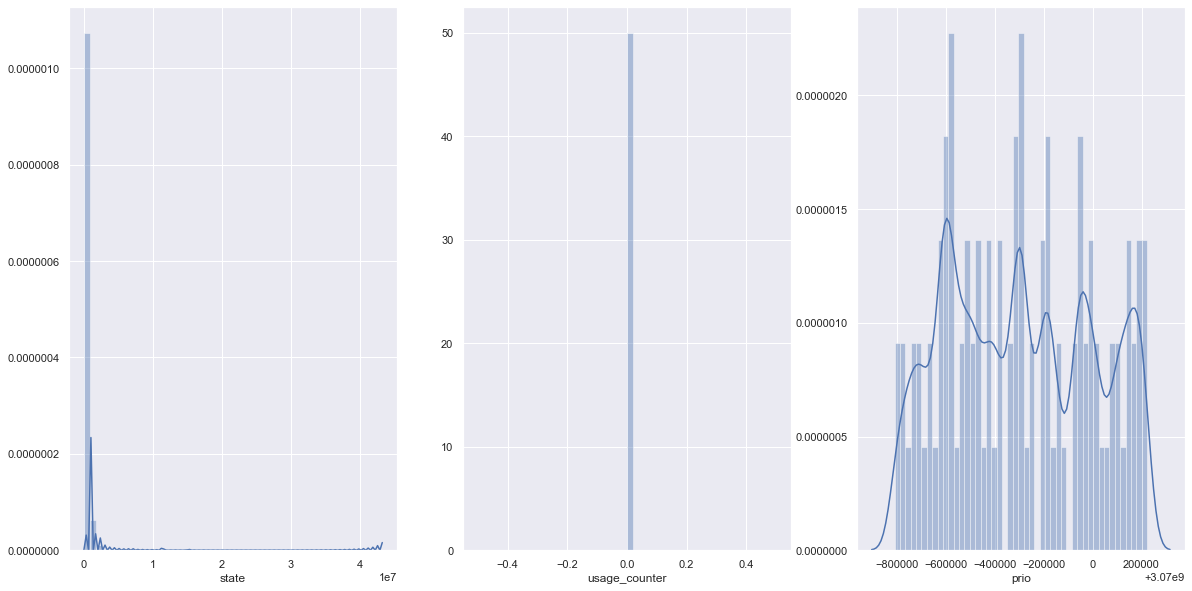

In [15]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.distplot(df_new[columns[2]],ax=axs[0])
sns.distplot(df_new[columns[3]],ax=axs[1])
sns.distplot(df_new[columns[4]],ax=axs[2])

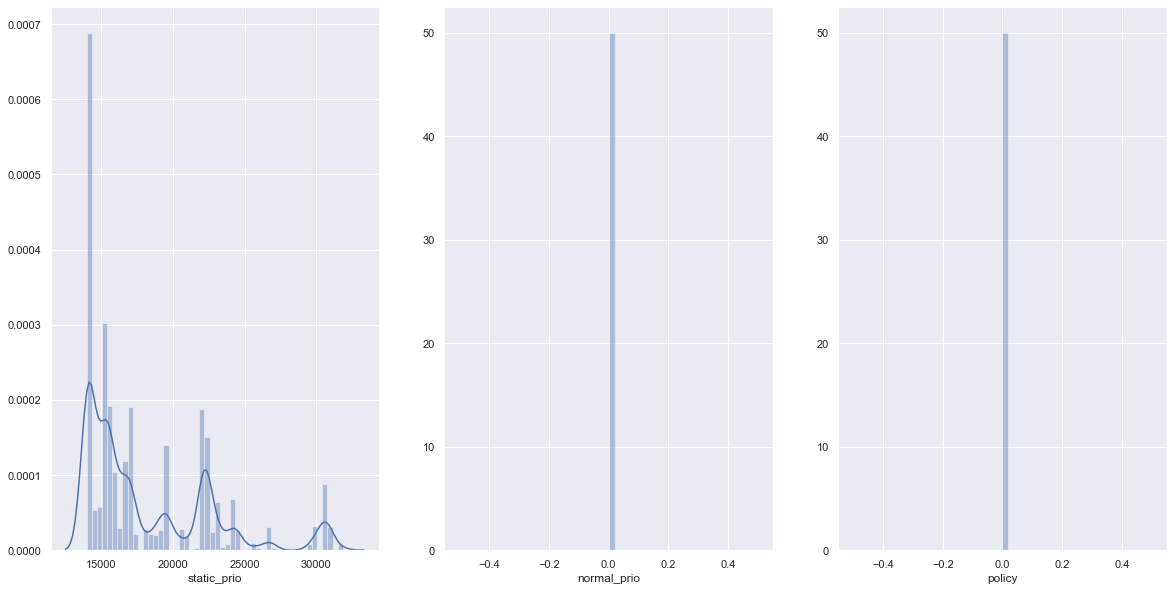

In [16]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.distplot(df_new[columns[5]],ax=axs[0])
sns.distplot(df_new[columns[6]],ax=axs[1])
sns.distplot(df_new[columns[7]],ax=axs[2])

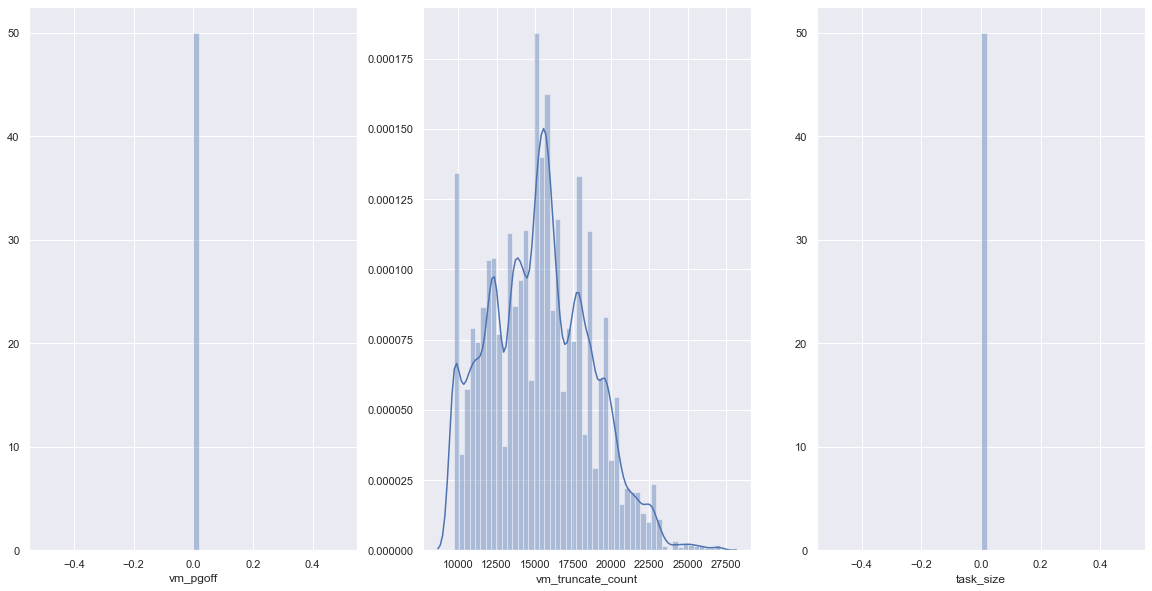

In [17]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.distplot(df_new[columns[8]],ax=axs[0])
sns.distplot(df_new[columns[9]],ax=axs[1])
sns.distplot(df_new[columns[10]],ax=axs[2])

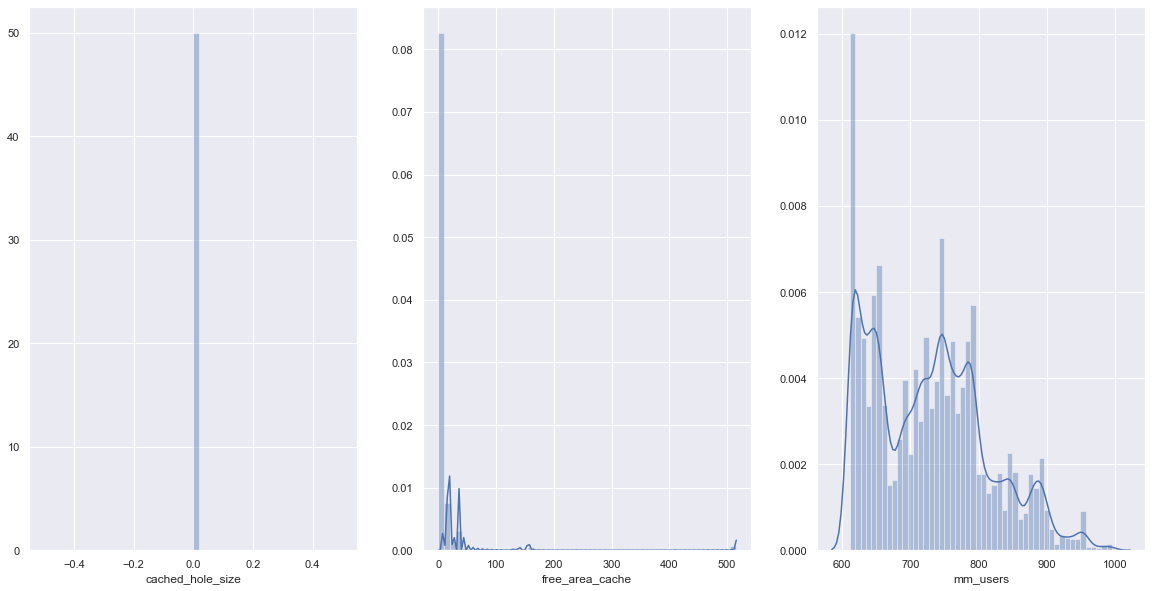

In [18]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.distplot(df_new[columns[11]],ax=axs[0])
sns.distplot(df_new[columns[12]],ax=axs[1])
sns.distplot(df_new[columns[13]],ax=axs[2])

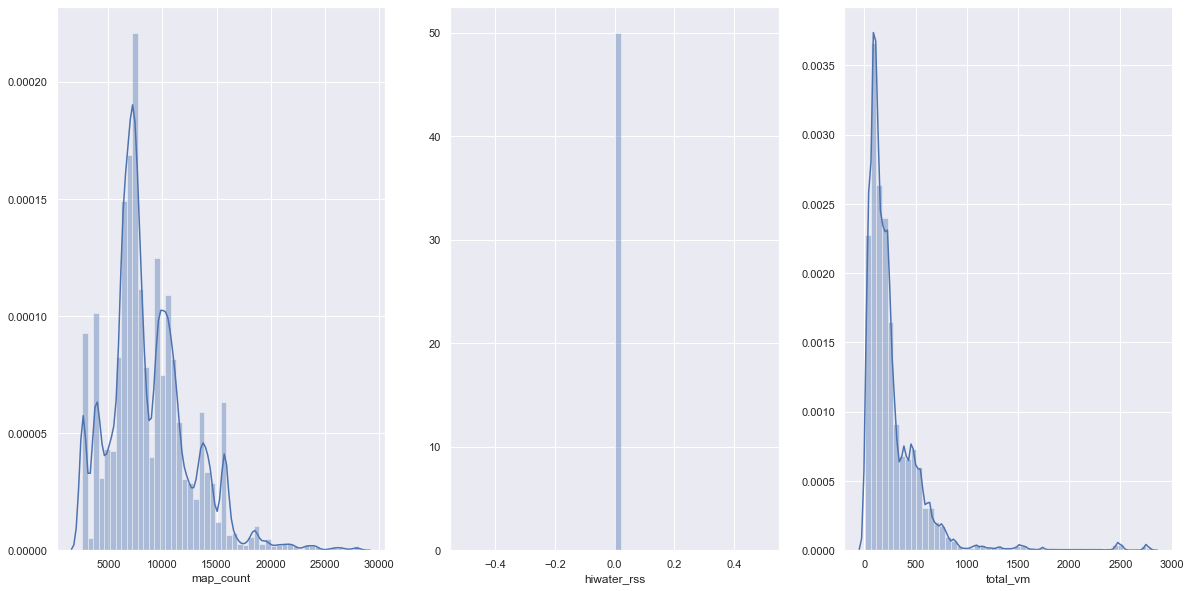

In [19]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.distplot(df_new[columns[14]],ax=axs[0])
sns.distplot(df_new[columns[15]],ax=axs[1])
sns.distplot(df_new[columns[16]],ax=axs[2])

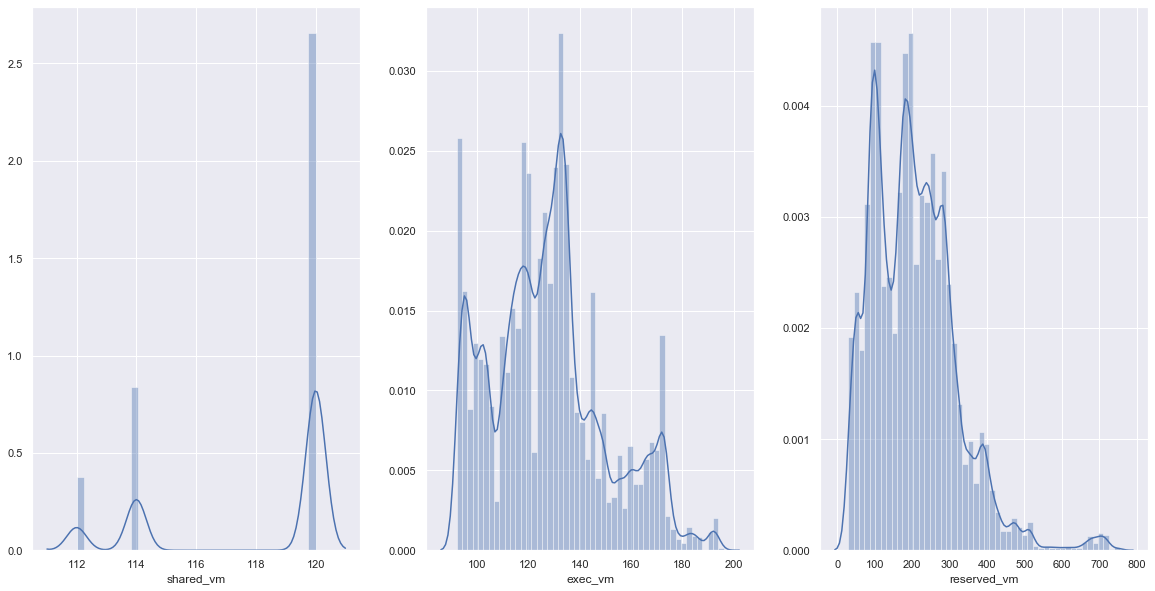

In [20]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.distplot(df_new[columns[17]],ax=axs[0])
sns.distplot(df_new[columns[18]],ax=axs[1])
sns.distplot(df_new[columns[19]],ax=axs[2])

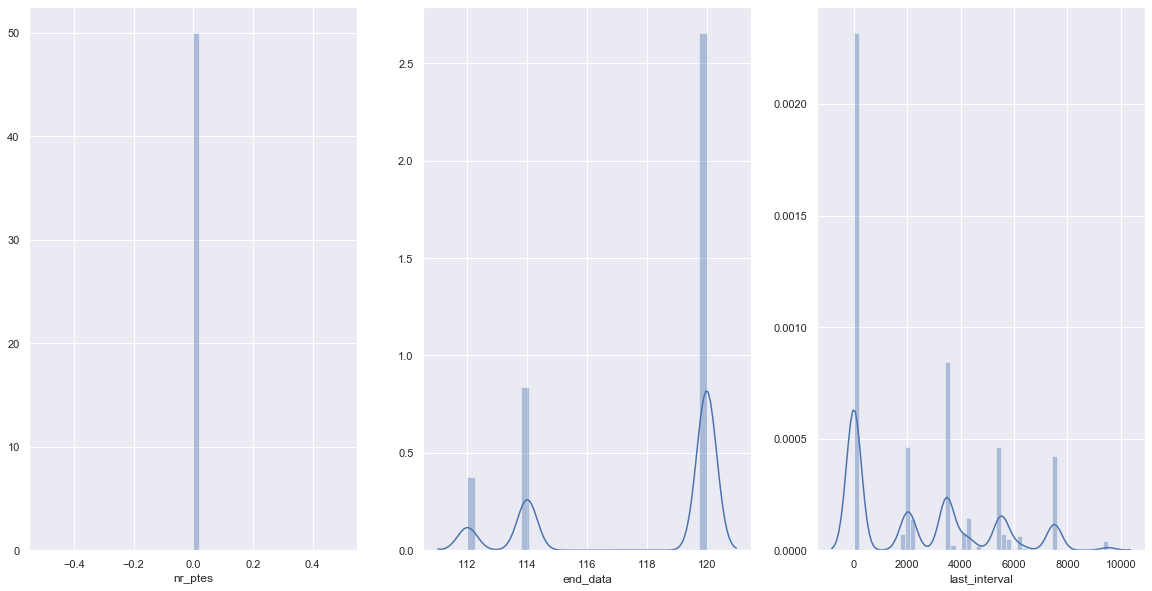

In [21]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.distplot(df_new[columns[20]],ax=axs[0])
sns.distplot(df_new[columns[21]],ax=axs[1])
sns.distplot(df_new[columns[22]],ax=axs[2])

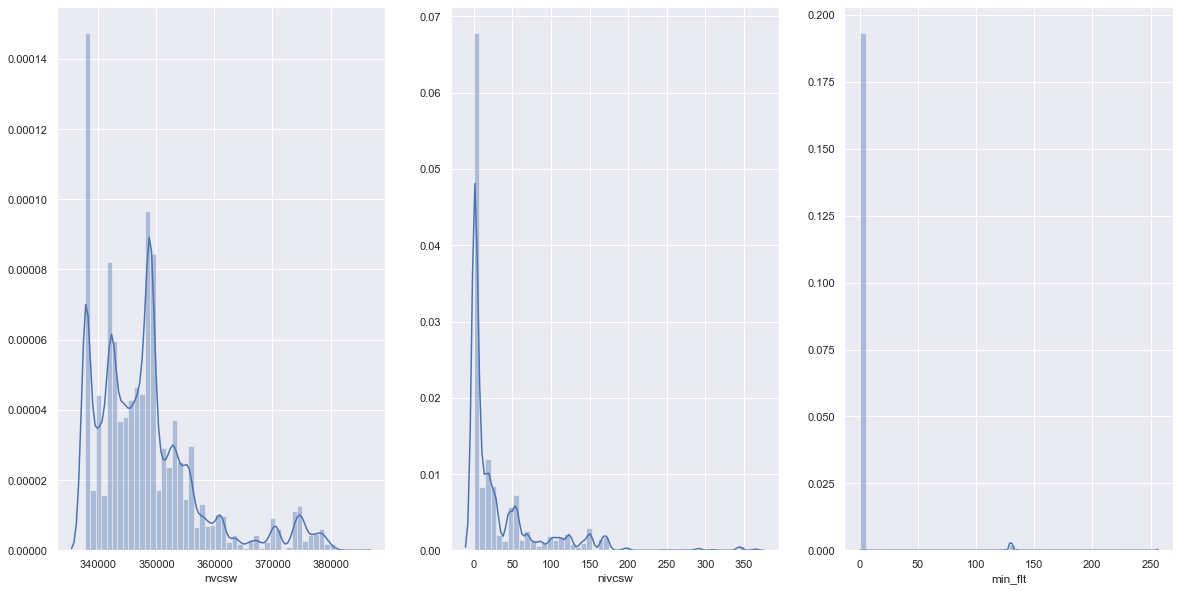

In [22]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.distplot(df_new[columns[23]],ax=axs[0])
sns.distplot(df_new[columns[24]],ax=axs[1])
sns.distplot(df_new[columns[25]],ax=axs[2])

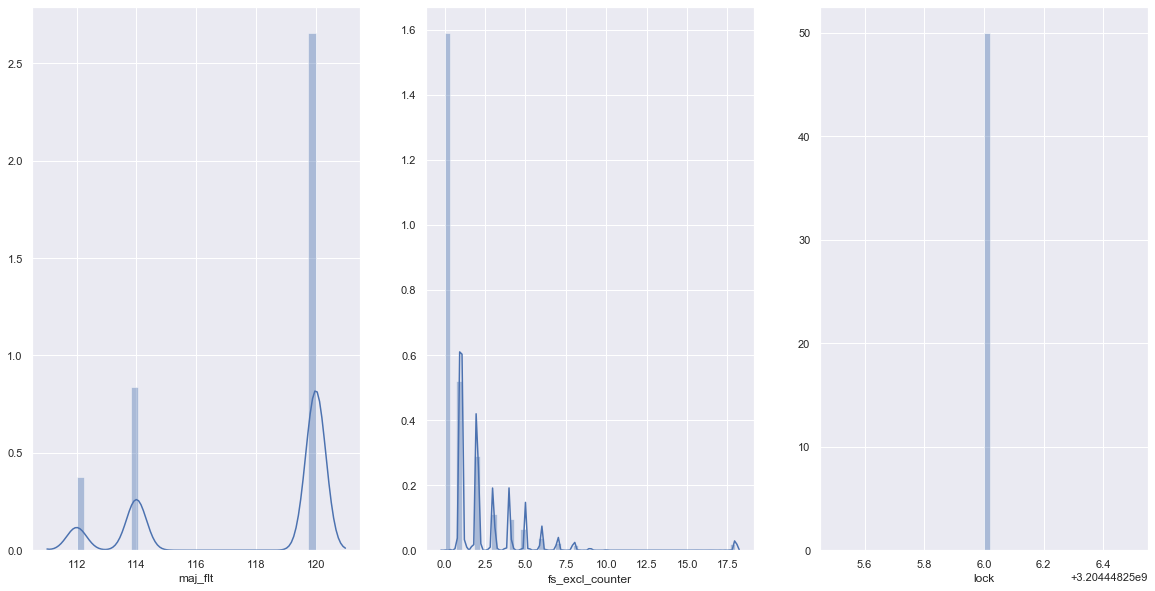

In [23]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.distplot(df_new[columns[26]],ax=axs[0])
sns.distplot(df_new[columns[27]],ax=axs[1])
sns.distplot(df_new[columns[28]],ax=axs[2])

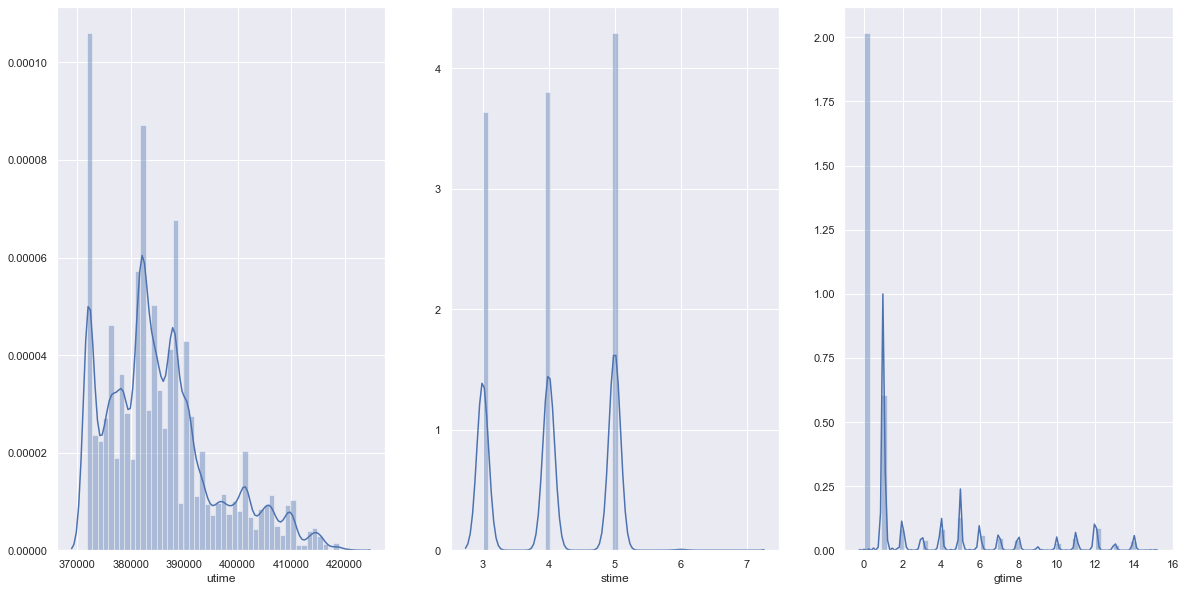

In [24]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.distplot(df_new[columns[29]],ax=axs[0])
sns.distplot(df_new[columns[30]],ax=axs[1])
sns.distplot(df_new[columns[31]],ax=axs[2])

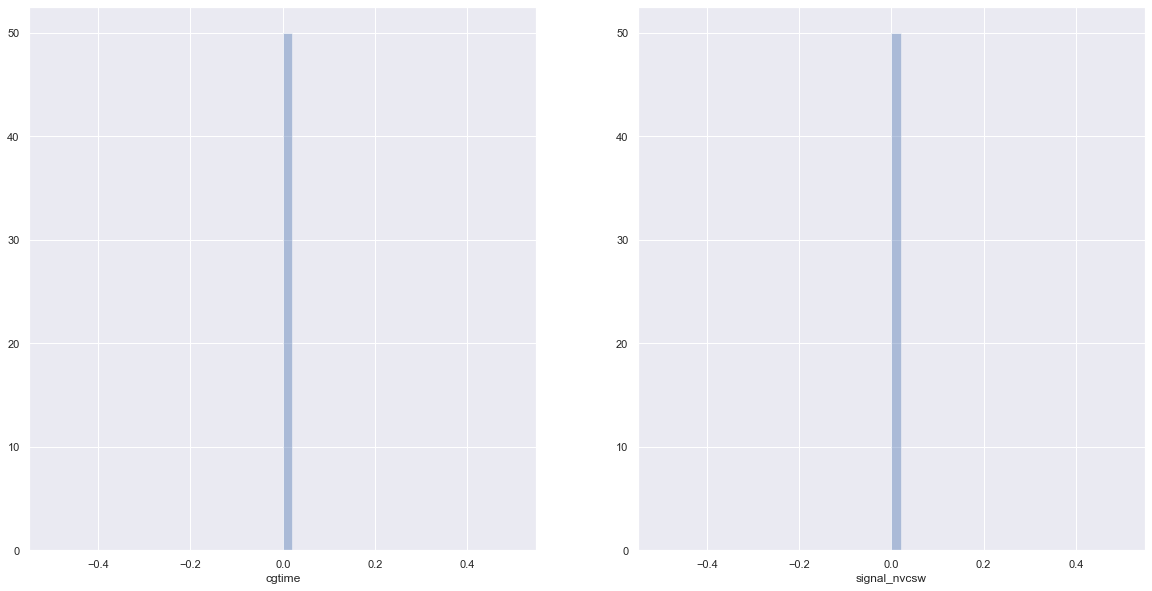

In [25]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=2)
sns.distplot(df_new[columns[32]],ax=axs[0])
sns.distplot(df_new[columns[33]],ax=axs[1])

#### Boxplot Visualization

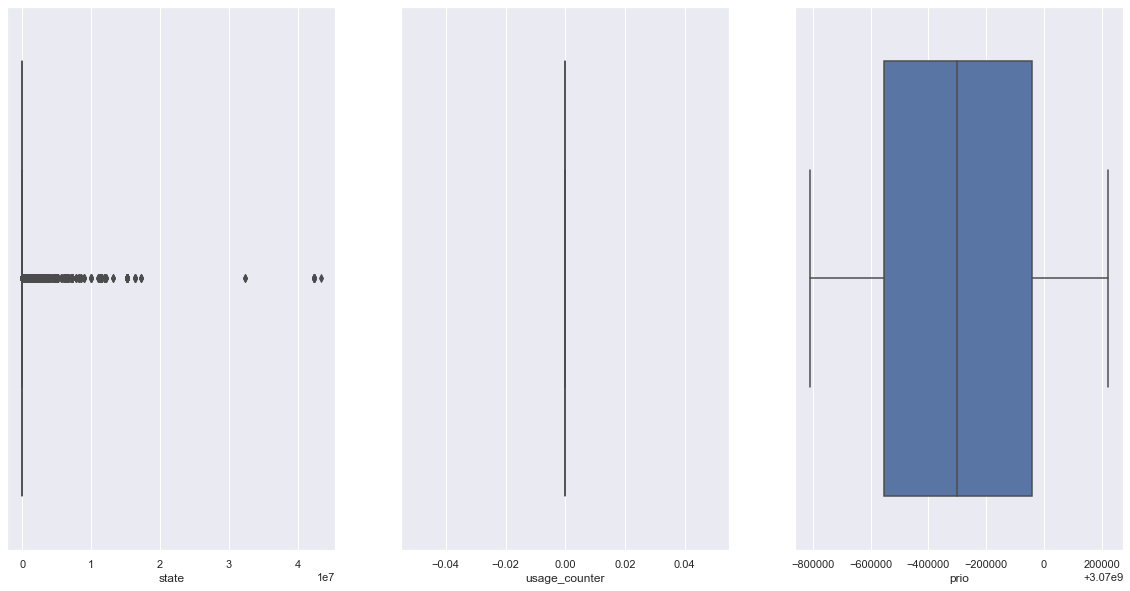

In [34]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x=columns[2], data=df_new, ax=axs[0])
sns.boxplot(x=columns[3], data=df_new, ax=axs[1])
sns.boxplot(x=columns[4], data=df_new, ax=axs[2])

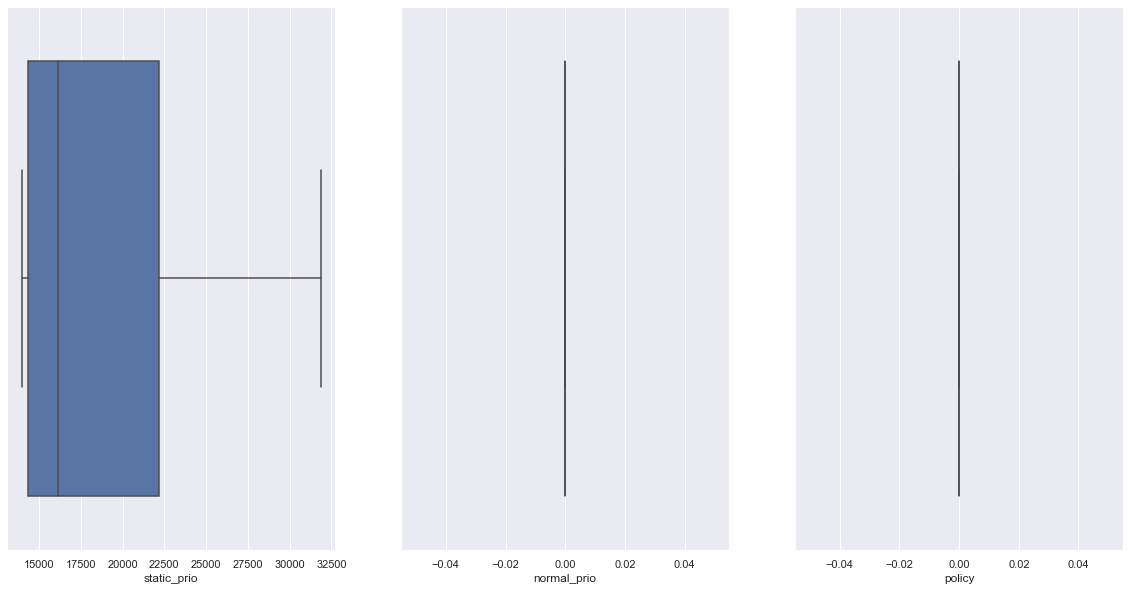

In [35]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x=columns[5], data=df_new, ax=axs[0])
sns.boxplot(x=columns[6], data=df_new, ax=axs[1])
sns.boxplot(x=columns[7], data=df_new, ax=axs[2])

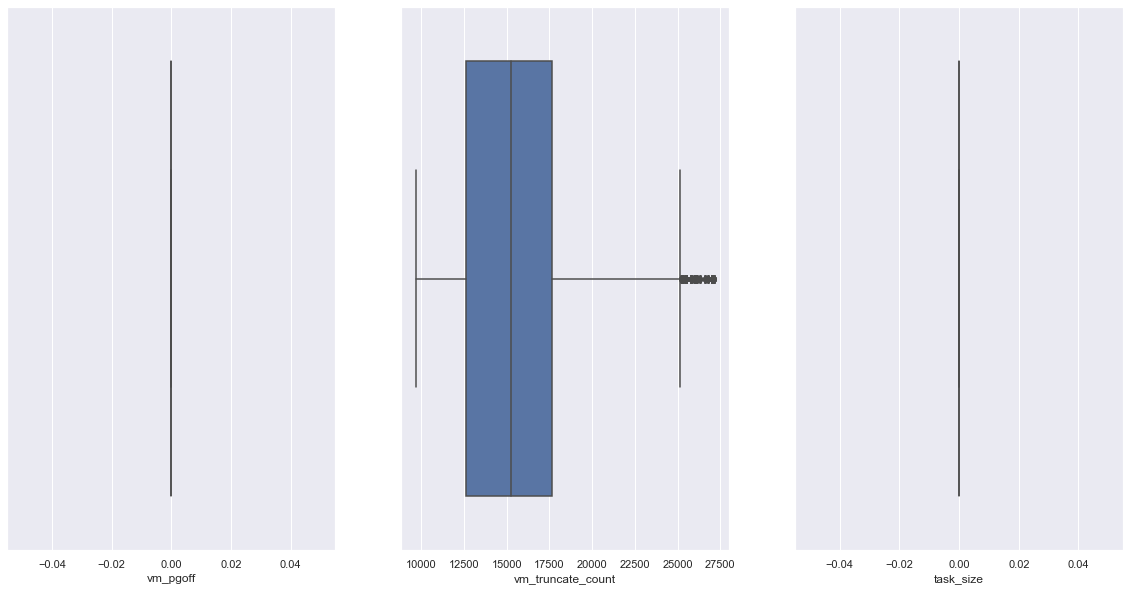

In [36]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x=columns[8], data=df_new, ax=axs[0])
sns.boxplot(x=columns[9], data=df_new, ax=axs[1])
sns.boxplot(x=columns[10], data=df_new, ax=axs[2])

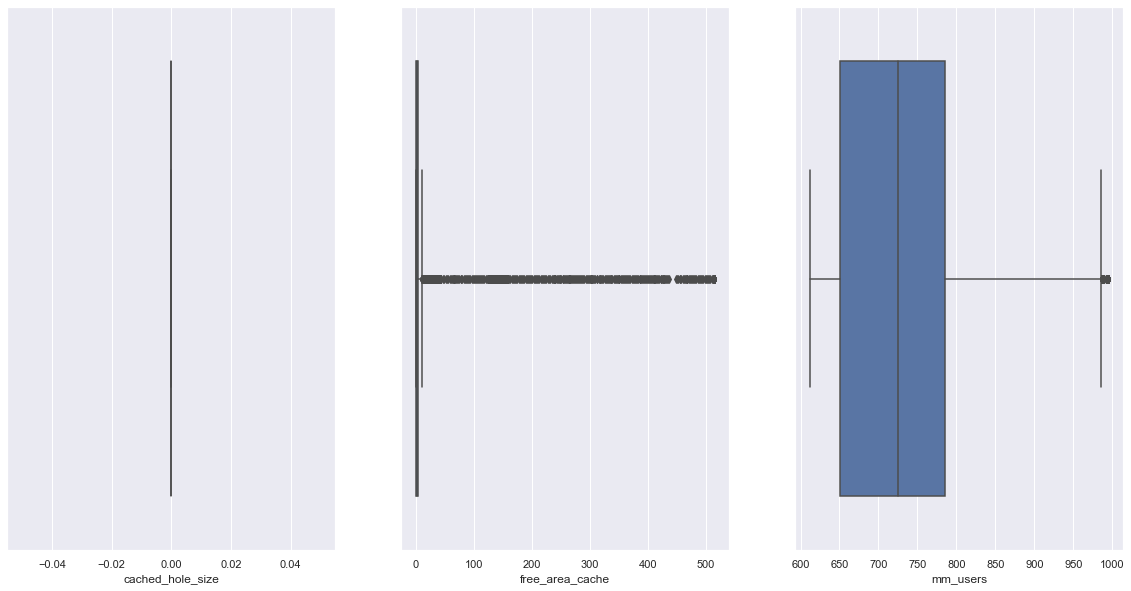

In [37]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x=columns[11], data=df_new, ax=axs[0])
sns.boxplot(x=columns[12], data=df_new, ax=axs[1])
sns.boxplot(x=columns[13], data=df_new, ax=axs[2])

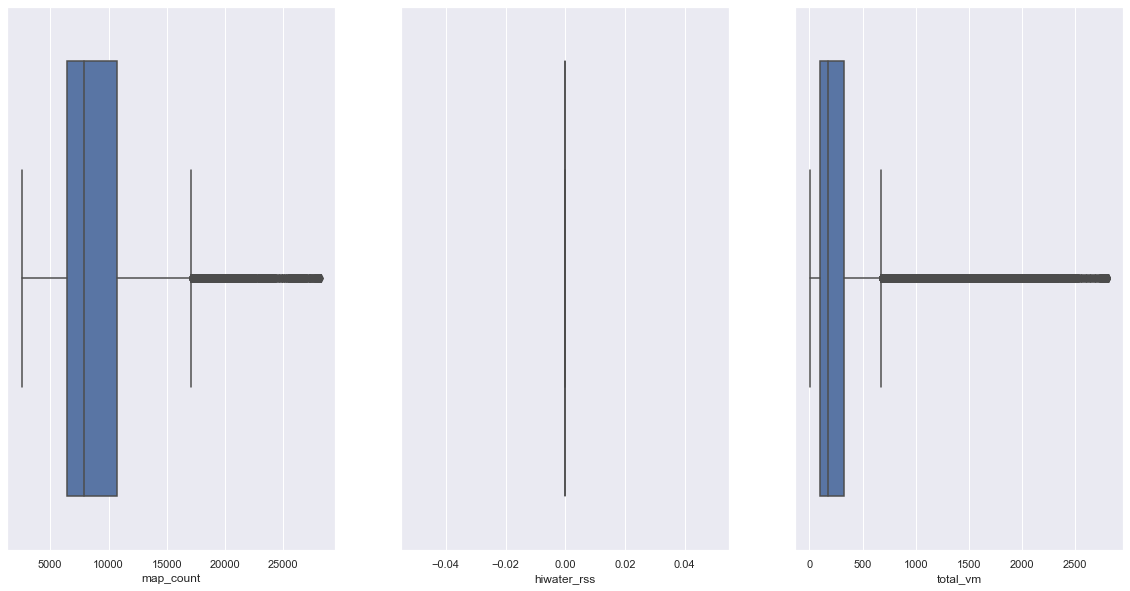

In [38]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x=columns[14], data=df_new, ax=axs[0])
sns.boxplot(x=columns[15], data=df_new, ax=axs[1])
sns.boxplot(x=columns[16], data=df_new, ax=axs[2])

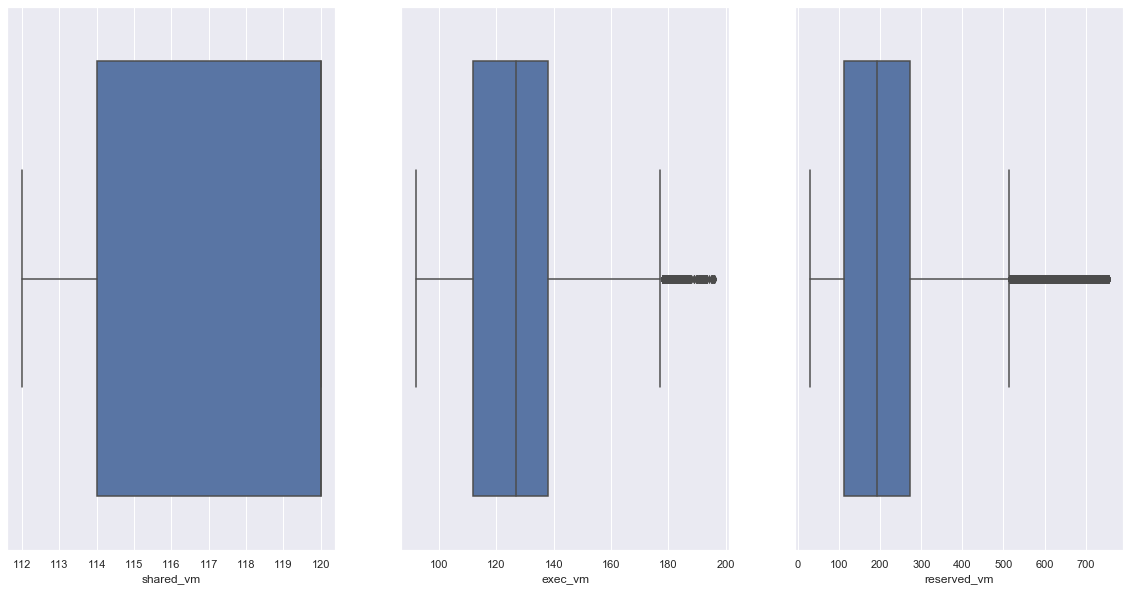

In [39]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x=columns[17], data=df_new, ax=axs[0])
sns.boxplot(x=columns[18], data=df_new, ax=axs[1])
sns.boxplot(x=columns[19], data=df_new, ax=axs[2])

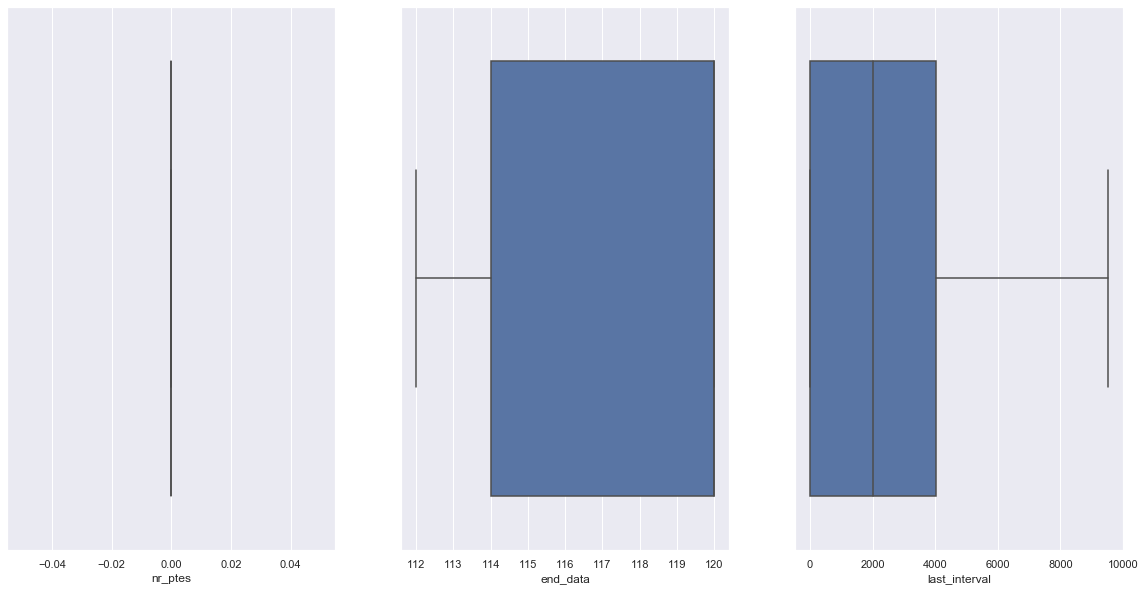

In [40]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x=columns[20], data=df_new, ax=axs[0])
sns.boxplot(x=columns[21], data=df_new, ax=axs[1])
sns.boxplot(x=columns[22], data=df_new, ax=axs[2])

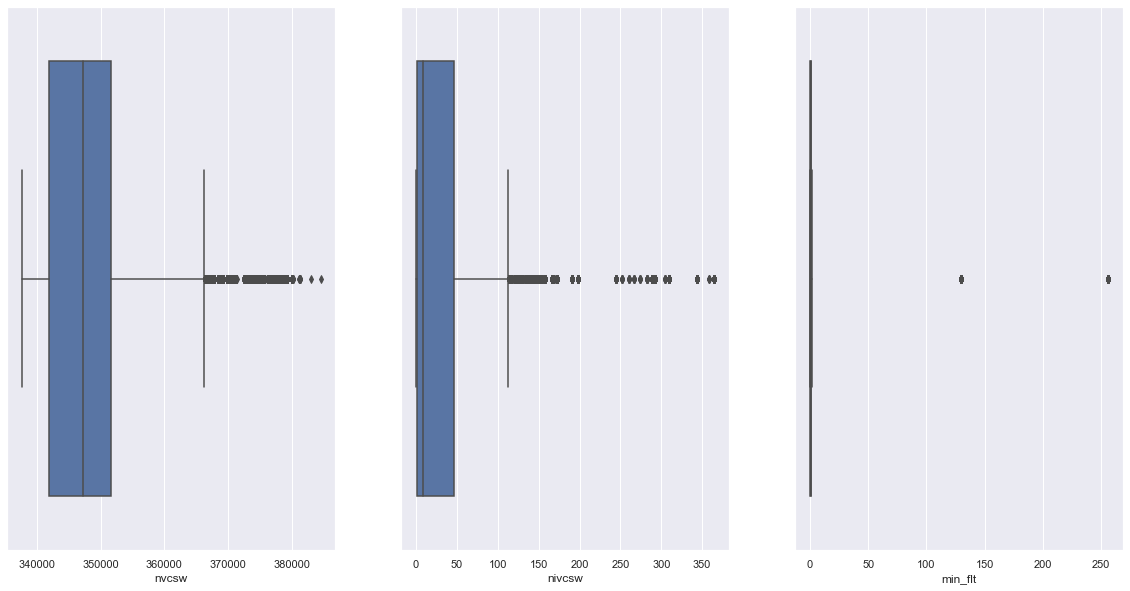

In [41]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x=columns[23], data=df_new, ax=axs[0])
sns.boxplot(x=columns[24], data=df_new, ax=axs[1])
sns.boxplot(x=columns[25], data=df_new, ax=axs[2])

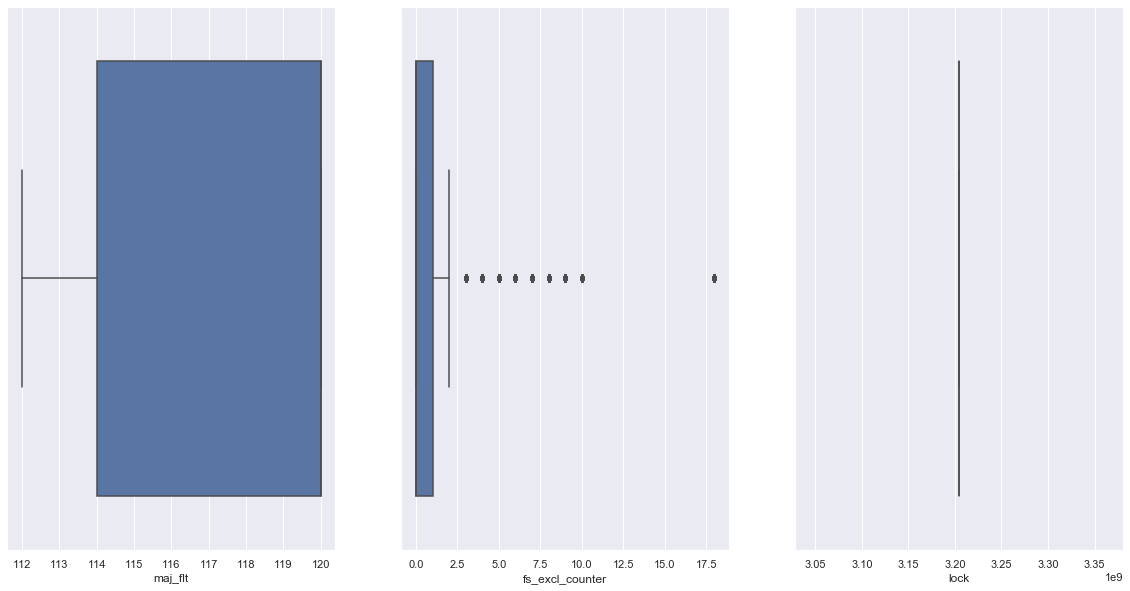

In [42]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x=columns[26], data=df_new, ax=axs[0])
sns.boxplot(x=columns[27], data=df_new, ax=axs[1])
sns.boxplot(x=columns[28], data=df_new, ax=axs[2])

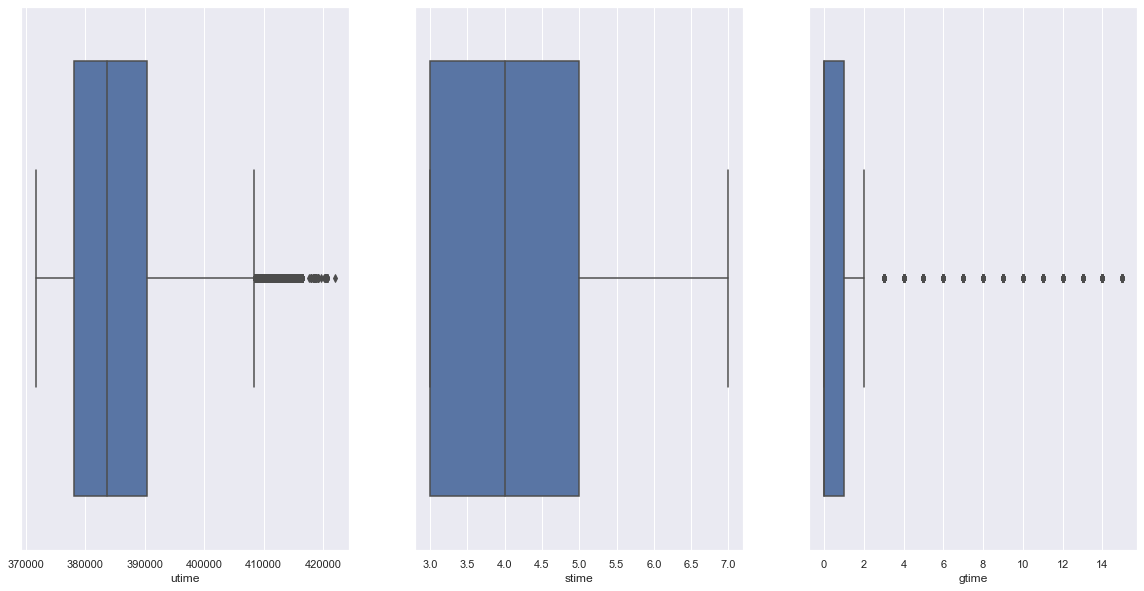

In [43]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x=columns[29], data=df_new, ax=axs[0])
sns.boxplot(x=columns[30], data=df_new, ax=axs[1])
sns.boxplot(x=columns[31], data=df_new, ax=axs[2])

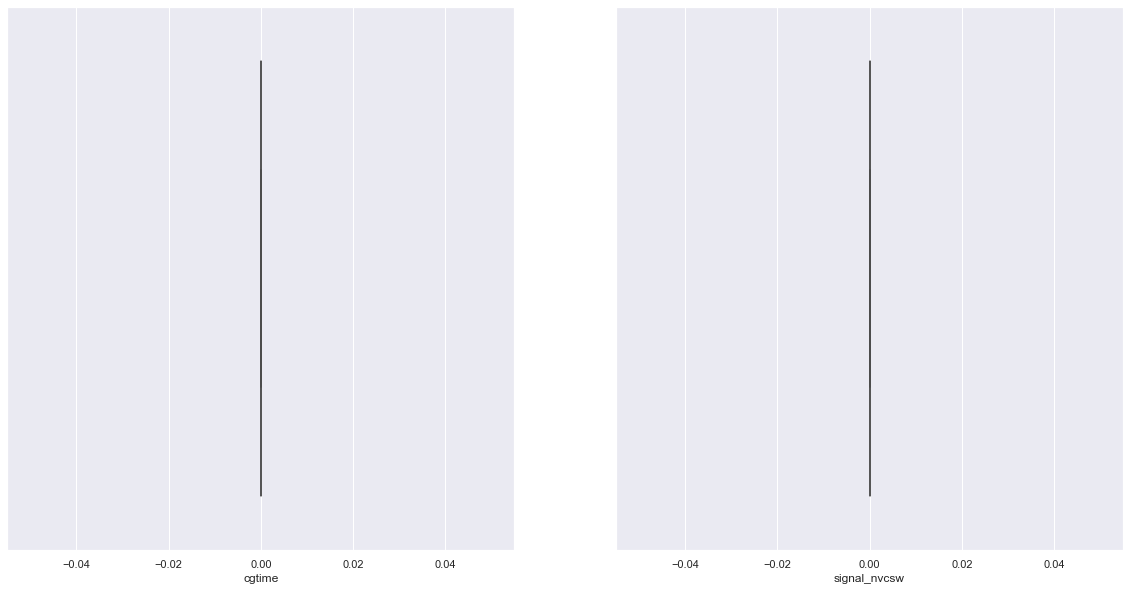

In [44]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=2)
sns.boxplot(x=columns[32], data=df_new, ax=axs[0])
sns.boxplot(x=columns[33], data=df_new, ax=axs[1])

#### Violin Visualization

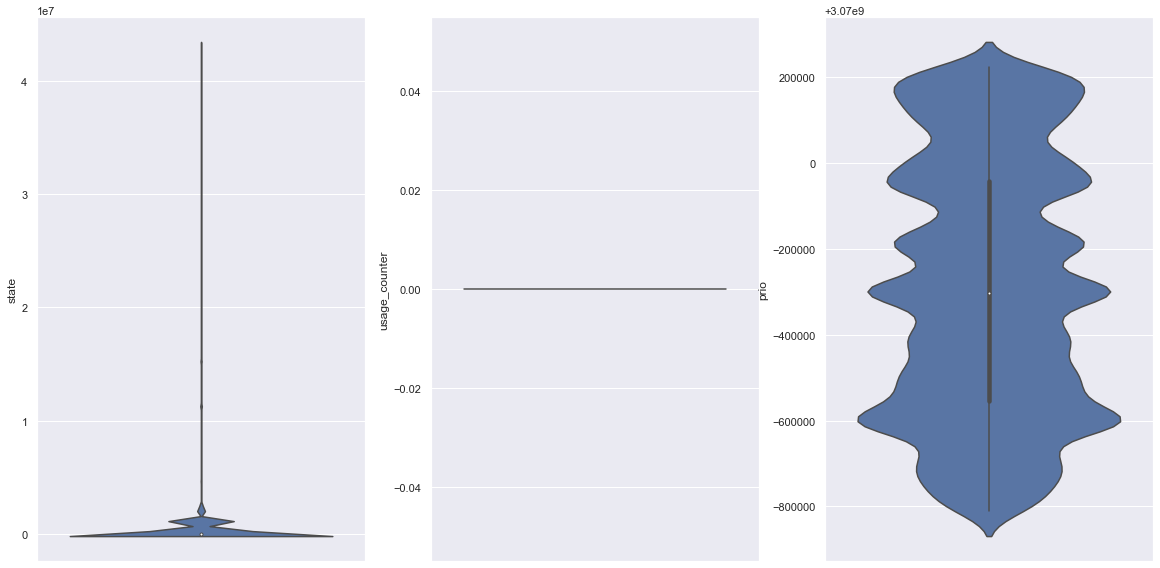

In [45]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.violinplot(y=columns[2], data=df_new, ax=axs[0])
sns.violinplot(y=columns[3], data=df_new, ax=axs[1])
sns.violinplot(y=columns[4], data=df_new, ax=axs[2])

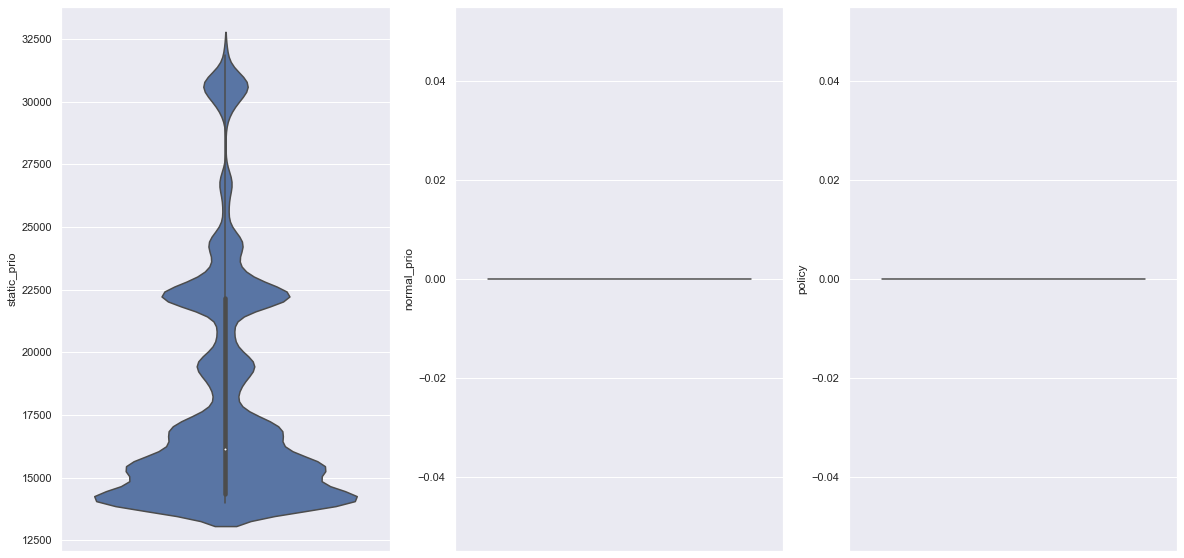

In [46]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.violinplot(y=columns[5], data=df_new, ax=axs[0])
sns.violinplot(y=columns[6], data=df_new, ax=axs[1])
sns.violinplot(y=columns[7], data=df_new, ax=axs[2])

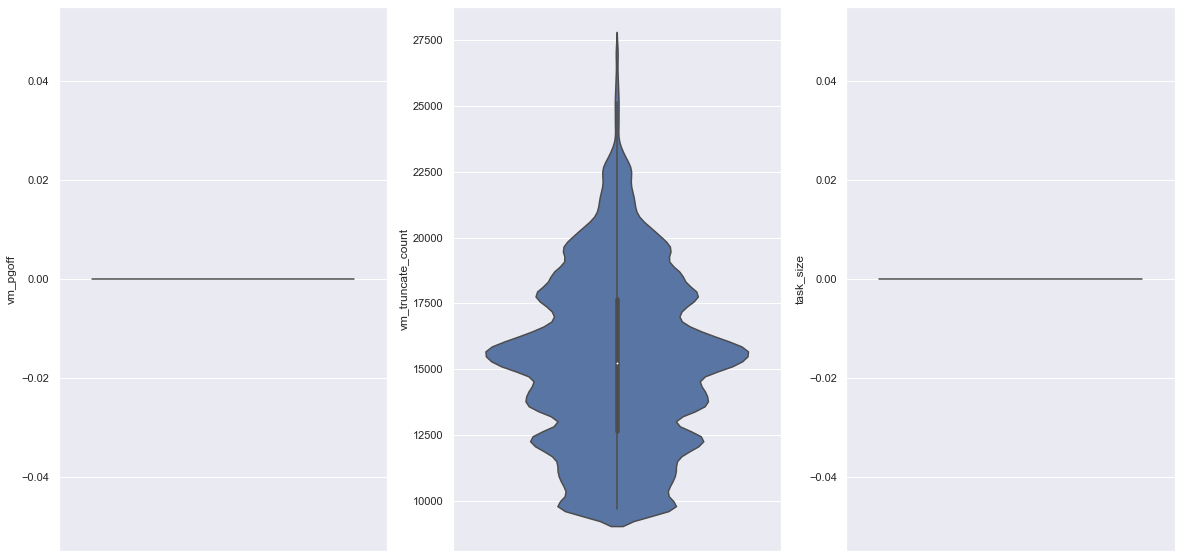

In [47]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.violinplot(y=columns[8], data=df_new, ax=axs[0])
sns.violinplot(y=columns[9], data=df_new, ax=axs[1])
sns.violinplot(y=columns[10], data=df_new, ax=axs[2])

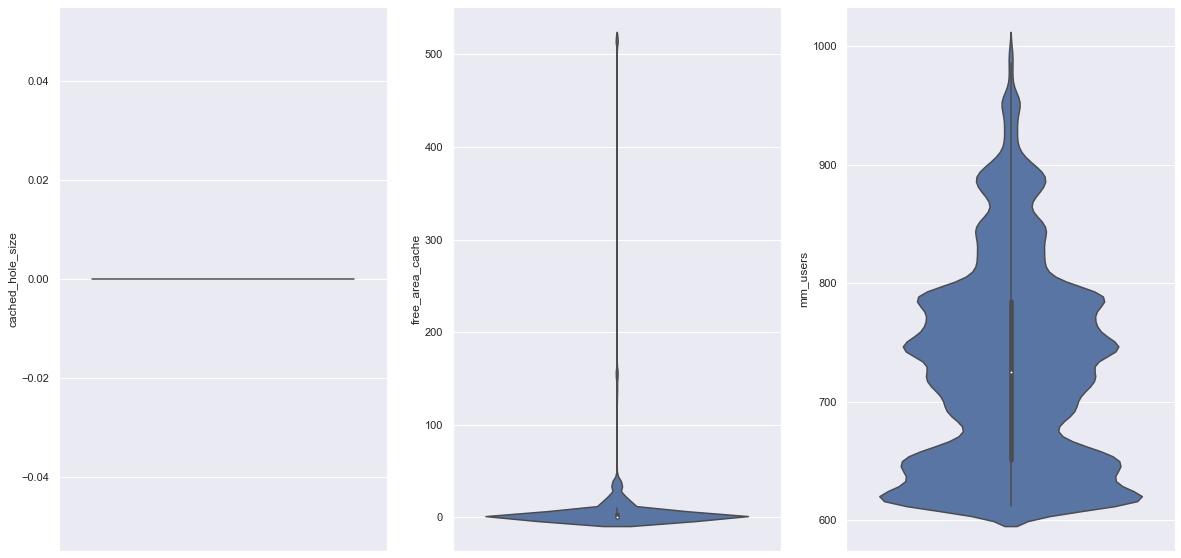

In [48]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.violinplot(y=columns[11], data=df_new, ax=axs[0])
sns.violinplot(y=columns[12], data=df_new, ax=axs[1])
sns.violinplot(y=columns[13], data=df_new, ax=axs[2])

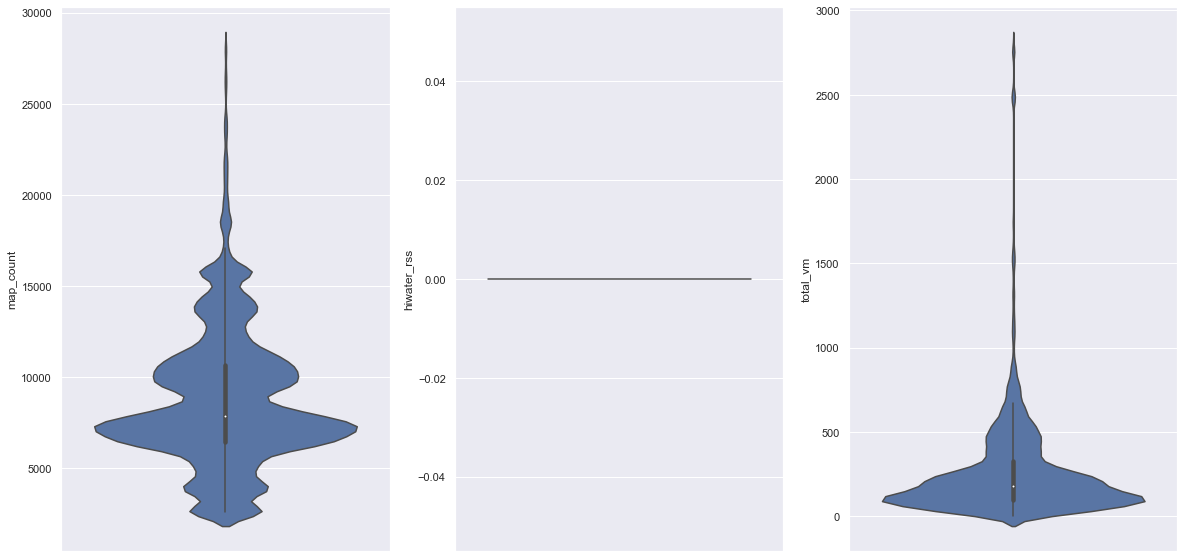

In [49]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.violinplot(y=columns[14], data=df_new, ax=axs[0])
sns.violinplot(y=columns[15], data=df_new, ax=axs[1])
sns.violinplot(y=columns[16], data=df_new, ax=axs[2])

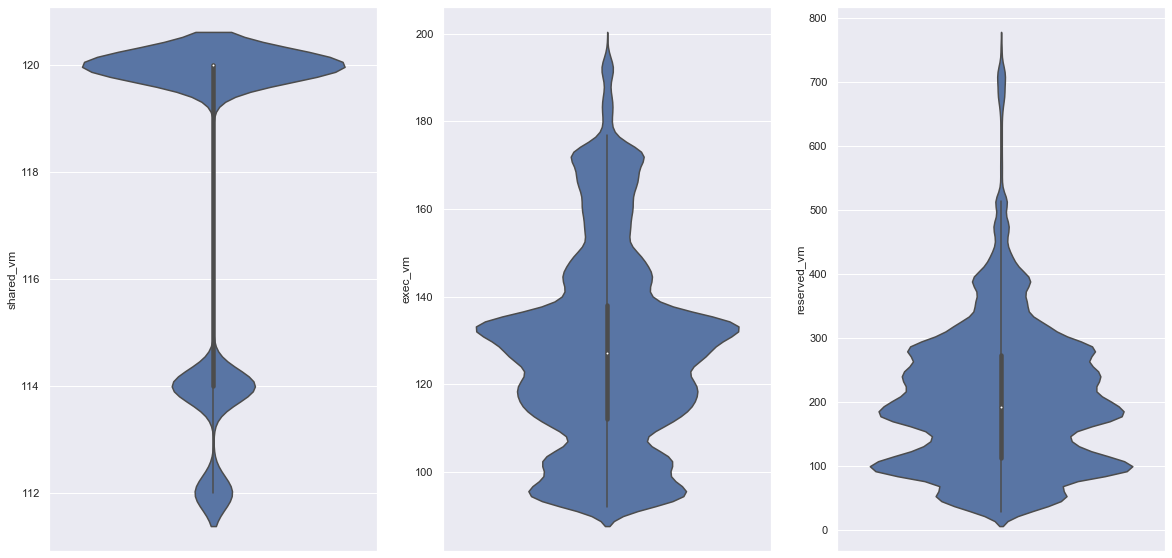

In [50]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.violinplot(y=columns[17], data=df_new, ax=axs[0])
sns.violinplot(y=columns[18], data=df_new, ax=axs[1])
sns.violinplot(y=columns[19], data=df_new, ax=axs[2])

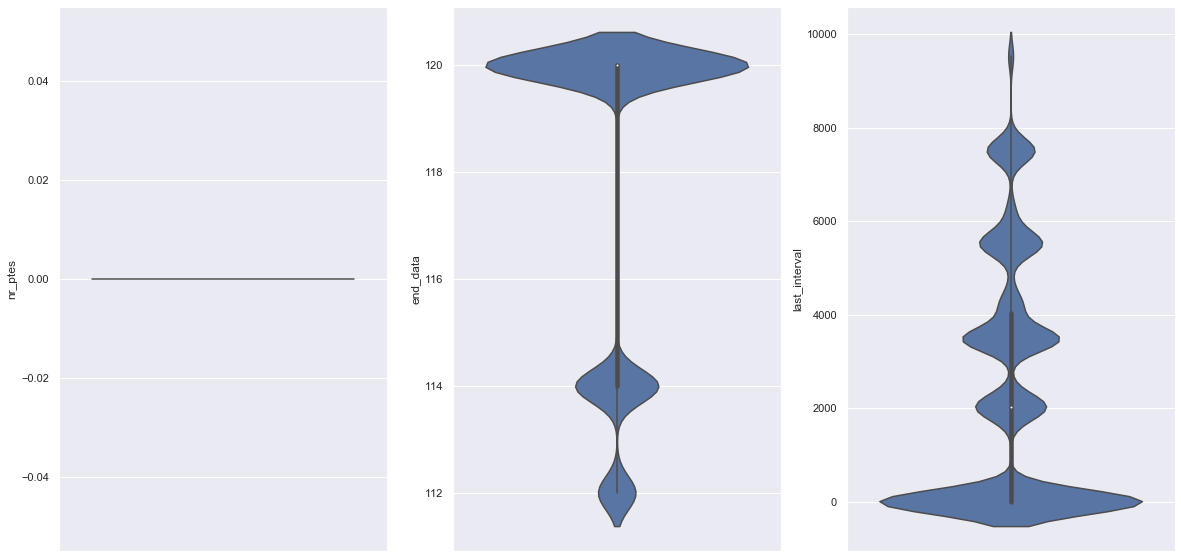

In [51]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.violinplot(y=columns[20], data=df_new, ax=axs[0])
sns.violinplot(y=columns[21], data=df_new, ax=axs[1])
sns.violinplot(y=columns[22], data=df_new, ax=axs[2])

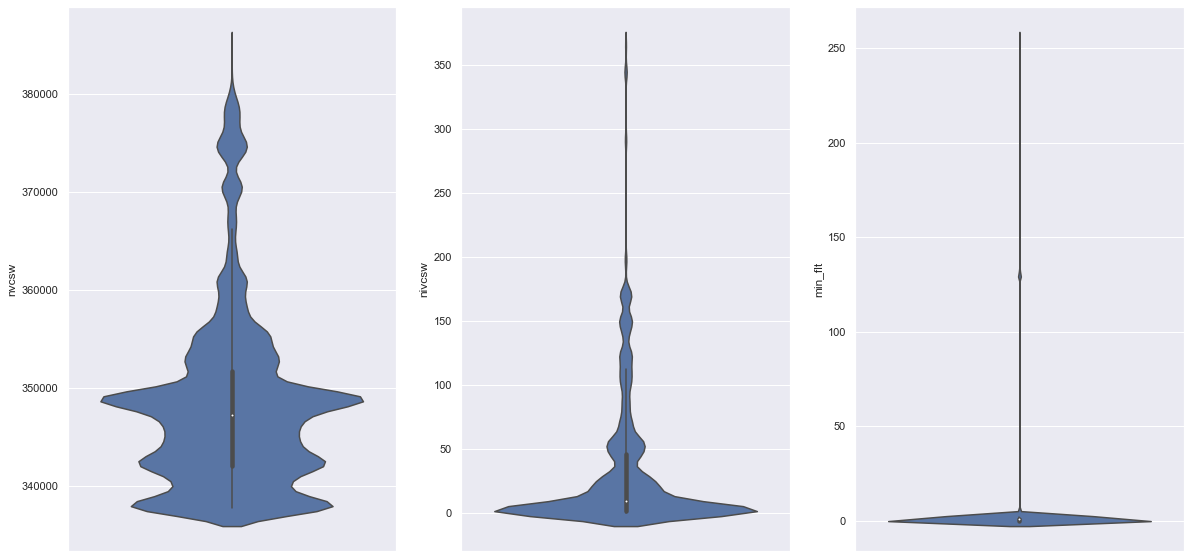

In [52]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.violinplot(y=columns[23], data=df_new, ax=axs[0])
sns.violinplot(y=columns[24], data=df_new, ax=axs[1])
sns.violinplot(y=columns[25], data=df_new, ax=axs[2])

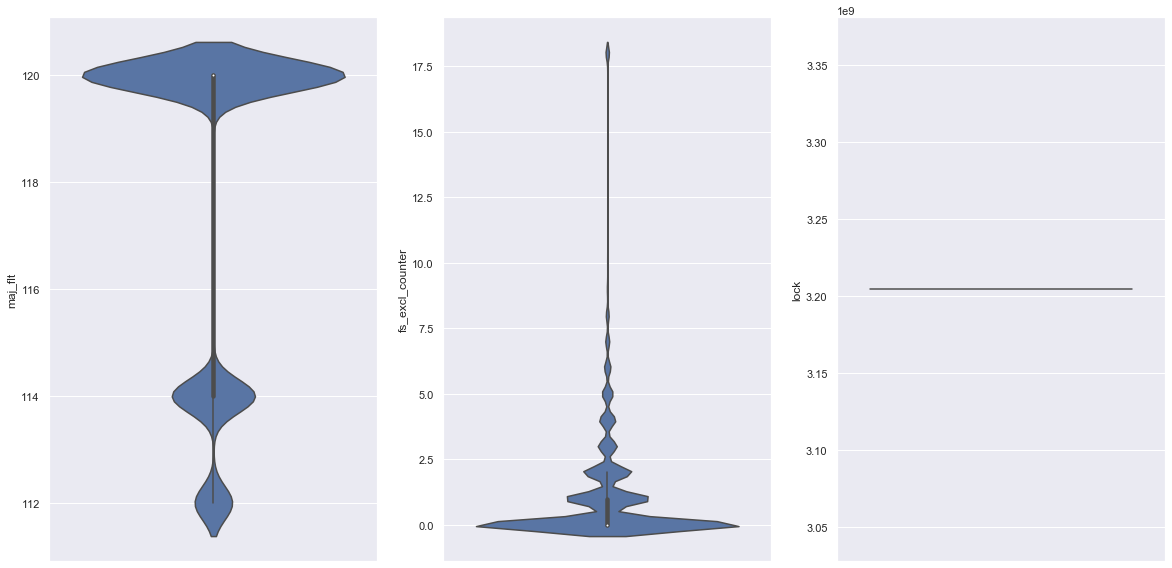

In [53]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.violinplot(y=columns[26], data=df_new, ax=axs[0])
sns.violinplot(y=columns[27], data=df_new, ax=axs[1])
sns.violinplot(y=columns[28], data=df_new, ax=axs[2])

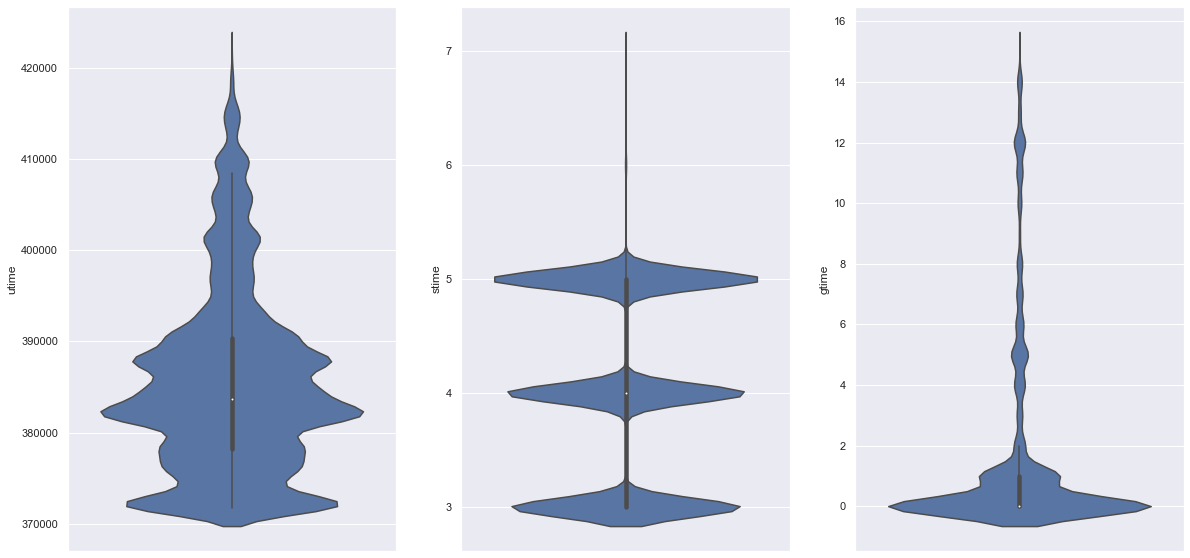

In [54]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.violinplot(y=columns[29], data=df_new, ax=axs[0])
sns.violinplot(y=columns[30], data=df_new, ax=axs[1])
sns.violinplot(y=columns[31], data=df_new, ax=axs[2])

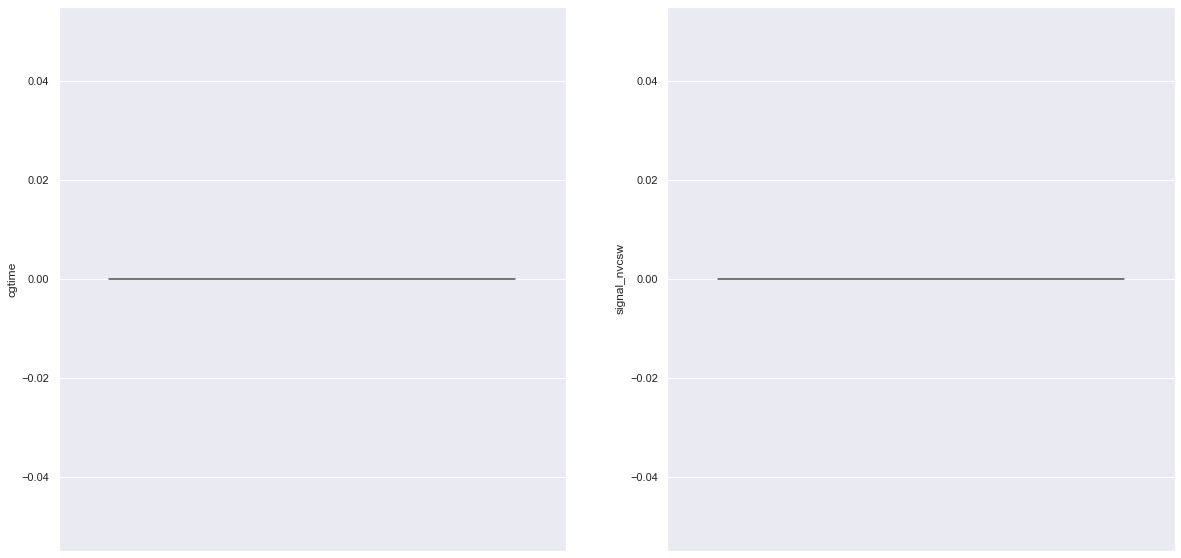

In [55]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=2)
sns.violinplot(y=columns[32], data=df_new, ax=axs[0])
sns.violinplot(y=columns[33], data=df_new, ax=axs[1])

#### Distribution Visualization

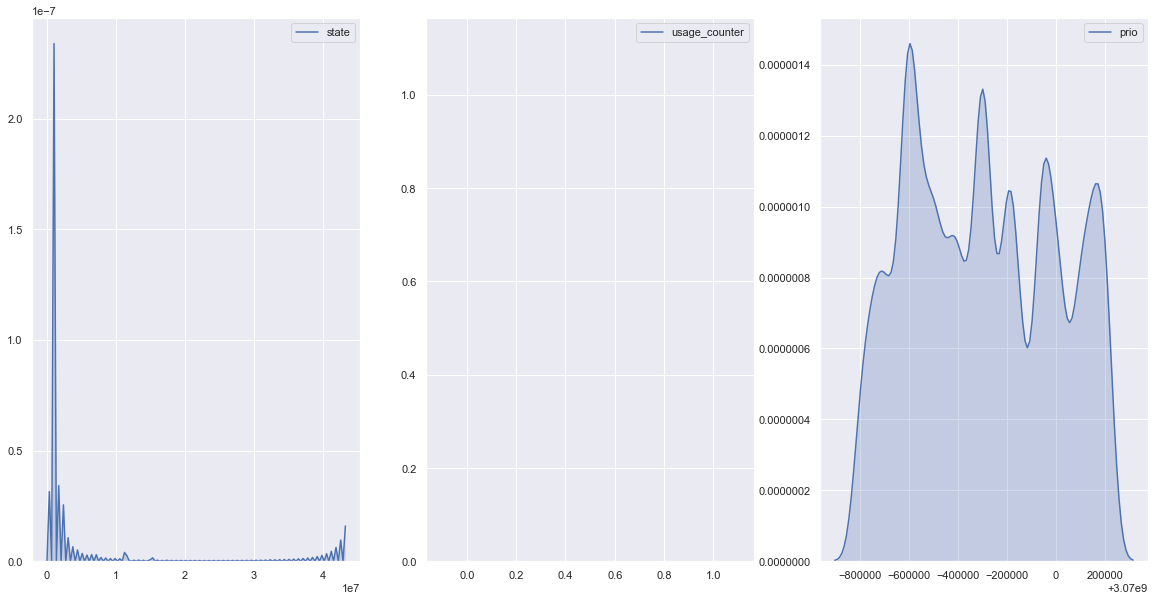

In [26]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.kdeplot(df[columns[2]],ax=axs[0],shade=True)
sns.kdeplot(df[columns[3]],ax=axs[1],shade=True)
sns.kdeplot(df[columns[4]],ax=axs[2],shade=True)

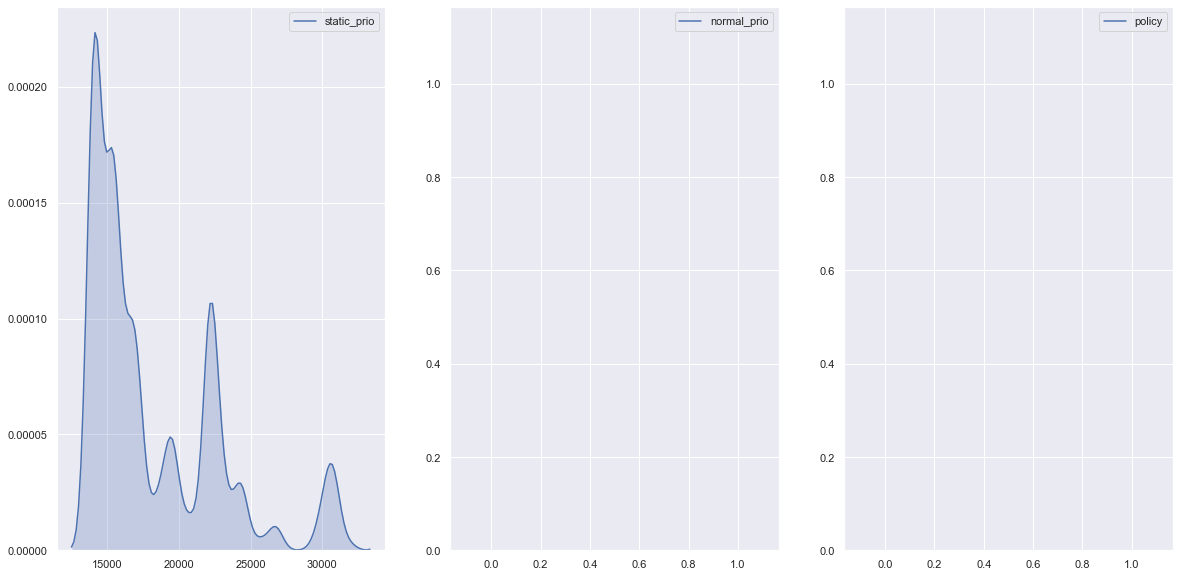

In [27]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.kdeplot(df[columns[5]],ax=axs[0],shade=True)
sns.kdeplot(df[columns[6]],ax=axs[1],shade=True)
sns.kdeplot(df[columns[7]],ax=axs[2],shade=True)

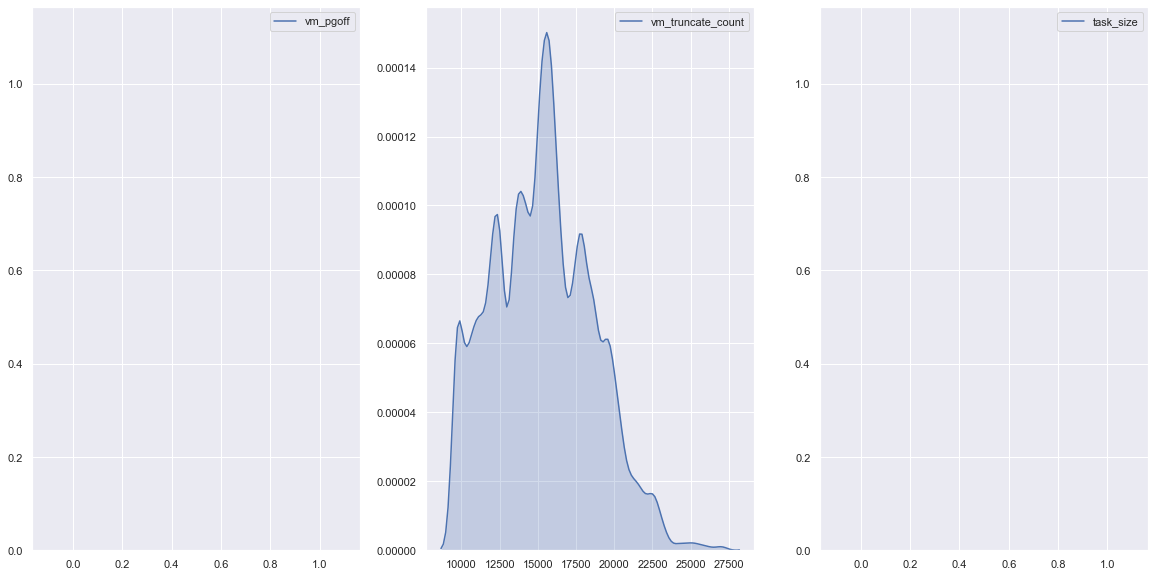

In [28]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.kdeplot(df[columns[8]],ax=axs[0],shade=True)
sns.kdeplot(df[columns[9]],ax=axs[1],shade=True)
sns.kdeplot(df[columns[10]],ax=axs[2],shade=True)

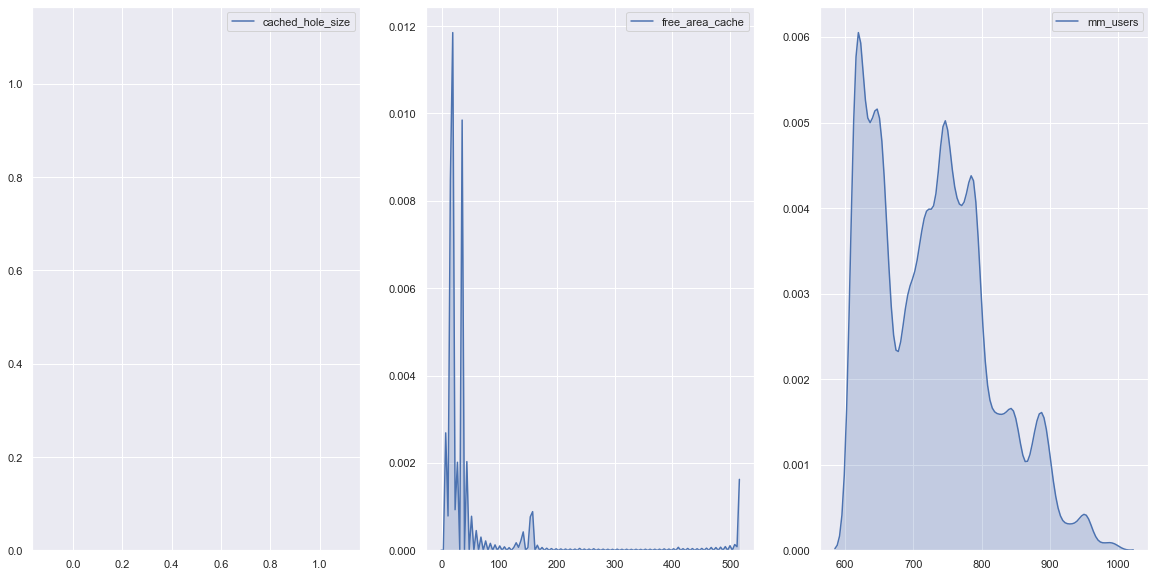

In [29]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.kdeplot(df[columns[11]],ax=axs[0],shade=True)
sns.kdeplot(df[columns[12]],ax=axs[1],shade=True)
sns.kdeplot(df[columns[13]],ax=axs[2],shade=True)

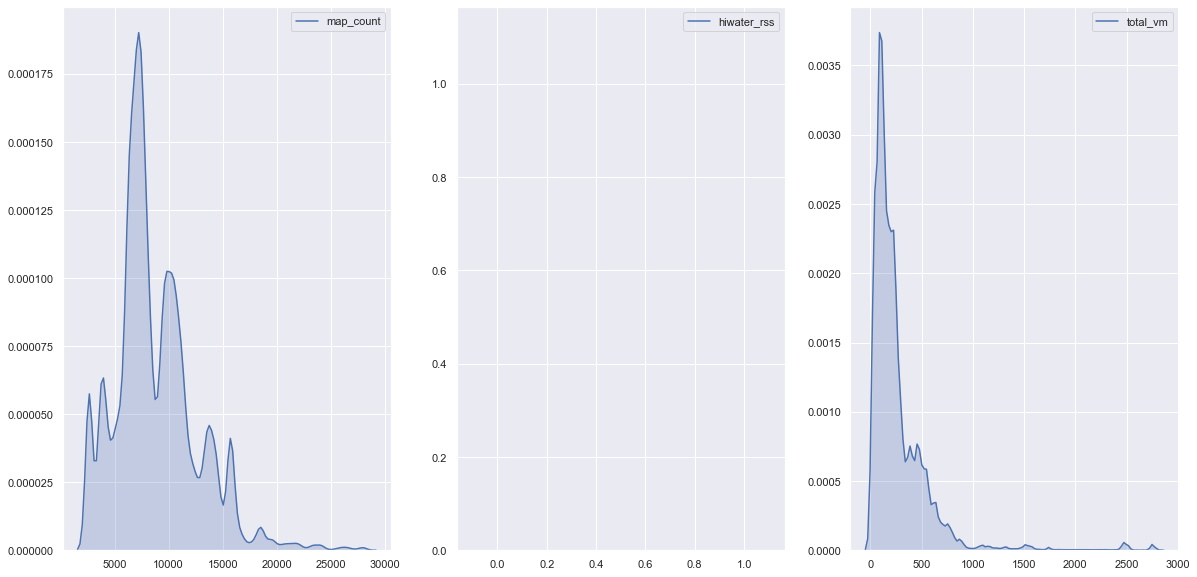

In [30]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.kdeplot(df[columns[14]],ax=axs[0],shade=True)
sns.kdeplot(df[columns[15]],ax=axs[1],shade=True)
sns.kdeplot(df[columns[16]],ax=axs[2],shade=True)

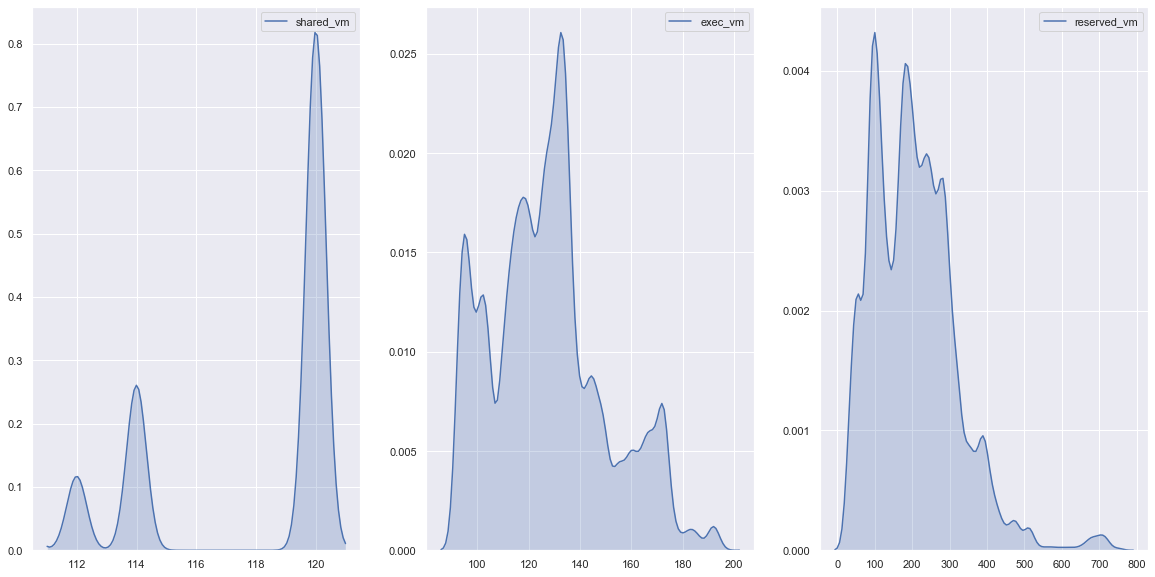

In [31]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.kdeplot(df[columns[17]],ax=axs[0],shade=True)
sns.kdeplot(df[columns[18]],ax=axs[1],shade=True)
sns.kdeplot(df[columns[19]],ax=axs[2],shade=True)

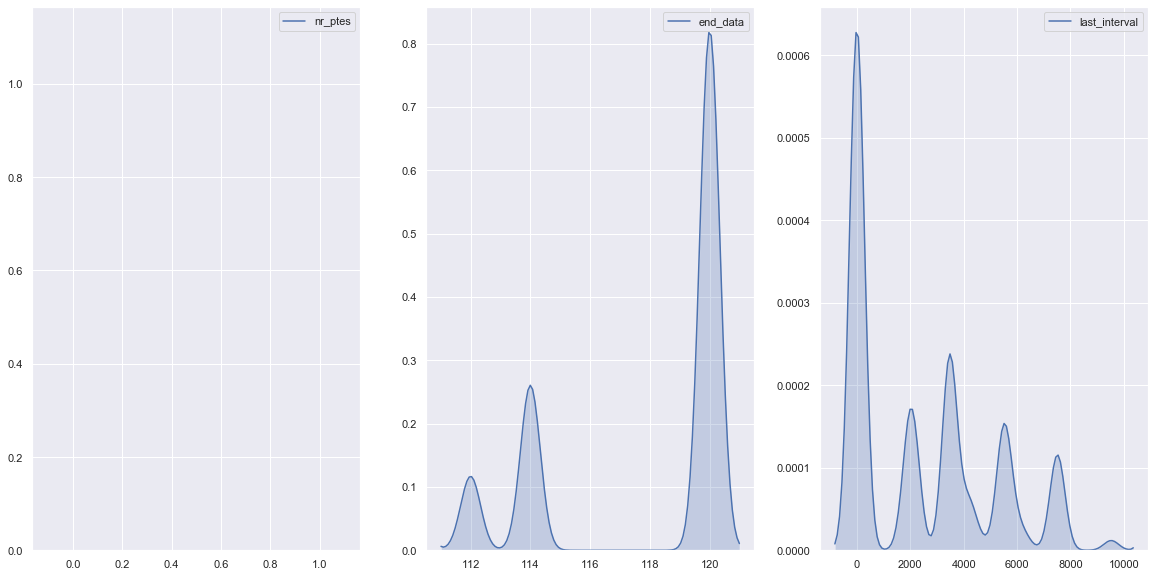

In [32]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.kdeplot(df[columns[20]],ax=axs[0],shade=True)
sns.kdeplot(df[columns[21]],ax=axs[1],shade=True)
sns.kdeplot(df[columns[22]],ax=axs[2],shade=True)

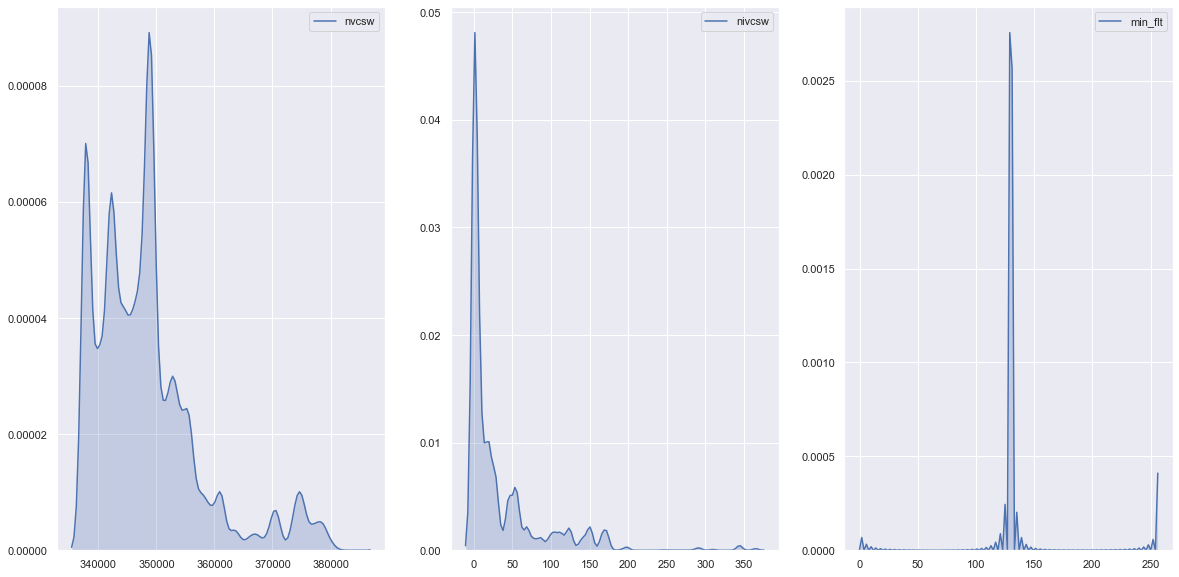

In [33]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.kdeplot(df[columns[23]],ax=axs[0],shade=True)
sns.kdeplot(df[columns[24]],ax=axs[1],shade=True)
sns.kdeplot(df[columns[25]],ax=axs[2],shade=True)

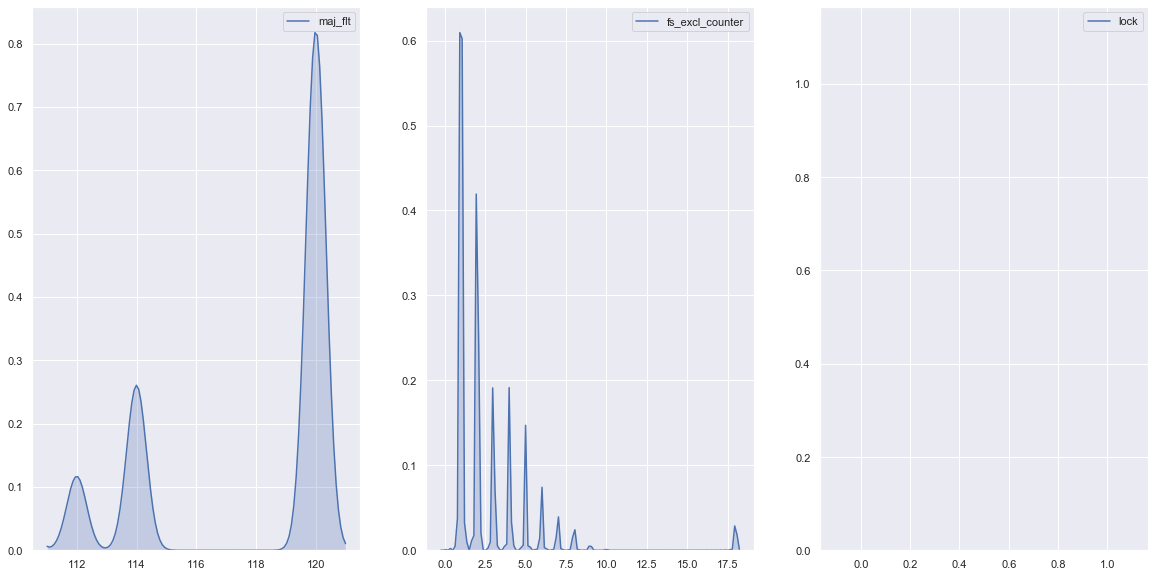

In [34]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.kdeplot(df[columns[26]],ax=axs[0],shade=True)
sns.kdeplot(df[columns[27]],ax=axs[1],shade=True)
sns.kdeplot(df[columns[28]],ax=axs[2],shade=True)

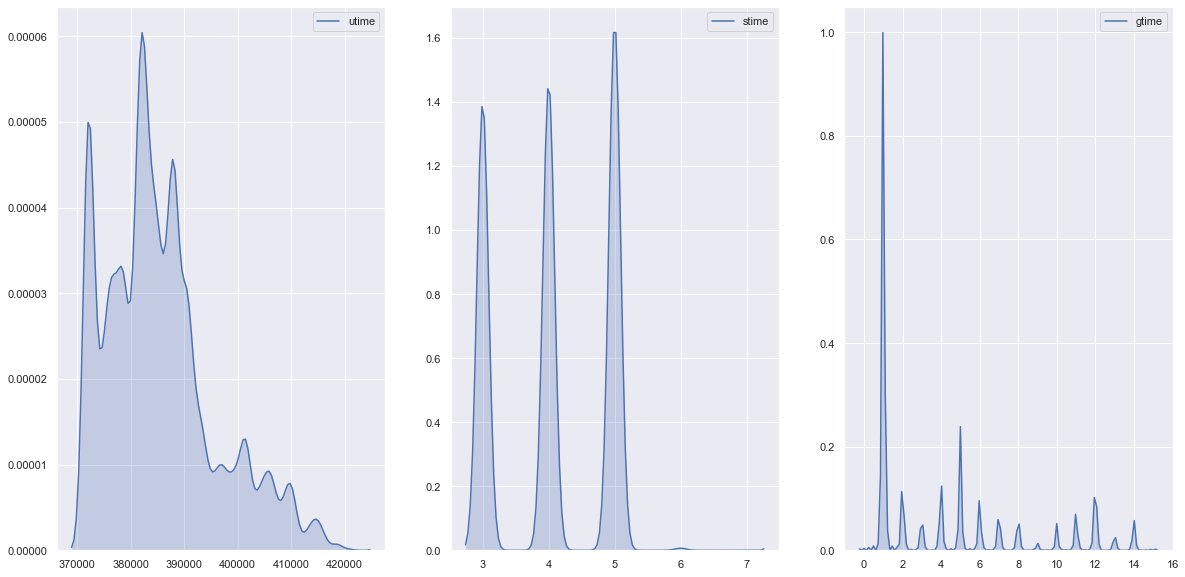

In [35]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=3)
sns.kdeplot(df[columns[29]],ax=axs[0],shade=True)
sns.kdeplot(df[columns[30]],ax=axs[1],shade=True)
sns.kdeplot(df[columns[31]],ax=axs[2],shade=True)

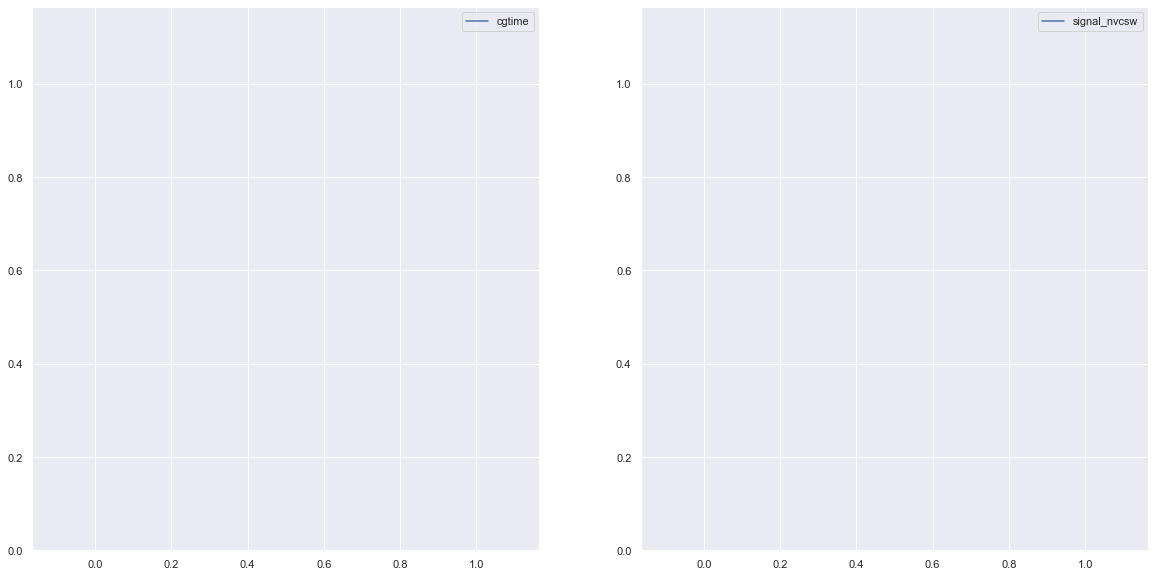

In [36]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axs = plt.subplots(ncols=2)
sns.kdeplot(df[columns[32]],ax=axs[0],shade=True)
sns.kdeplot(df[columns[33]],ax=axs[1],shade=True)

<a id='4.2'></a><br>
### Bivarite Analysis and Some Visualizations

#### Numerical& Numerical

In [67]:
df_new.columns

Index(['millisecond', 'classification', 'state', 'usage_counter', 'prio',
       'static_prio', 'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count',
       'task_size', 'cached_hole_size', 'free_area_cache', 'mm_users',
       'map_count', 'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm',
       'reserved_vm', 'nr_ptes', 'end_data', 'last_interval', 'nvcsw',
       'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock', 'utime',
       'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

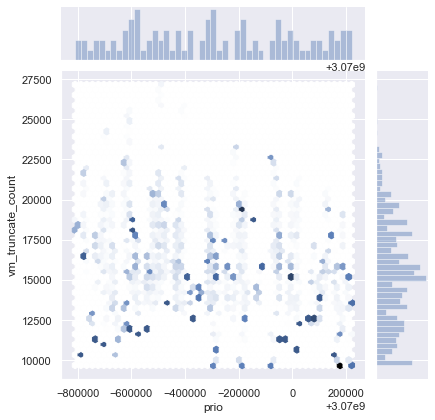

In [68]:
sns.jointplot(x=df_new['prio'],y=df_new['vm_truncate_count'],kind='hex')

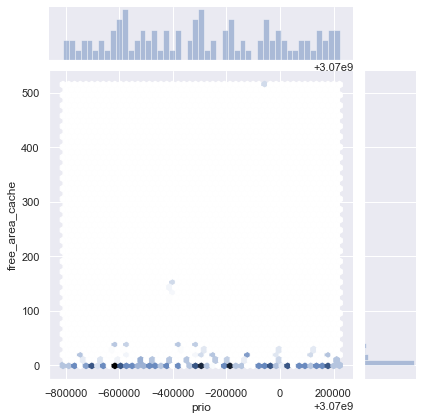

In [69]:
sns.jointplot(x=df_new['prio'],y=df_new['free_area_cache'],kind='hex')

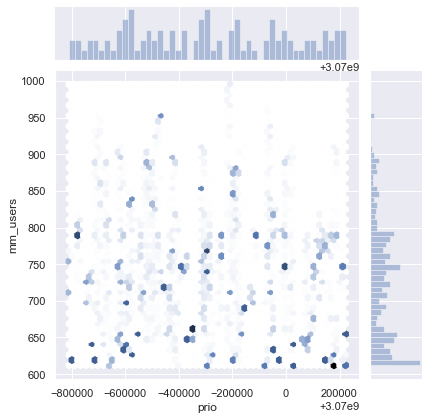

In [70]:
sns.jointplot(x=df_new['prio'],y=df_new['mm_users'],kind='hex')

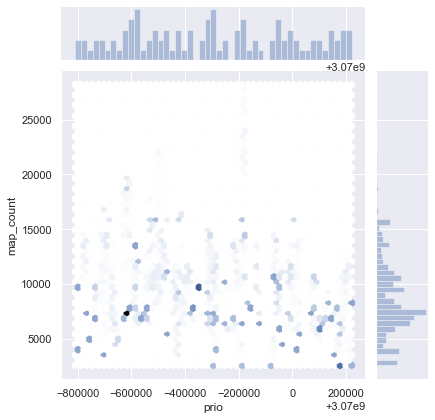

In [71]:
sns.jointplot(x=df_new['prio'],y=df_new['map_count'],kind='hex')

<a id='5'></a><br>
## Statistics

In [72]:
df_new.head()

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
1,1,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
2,2,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
3,3,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
4,4,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0


In [7]:
df_stat = df_new.drop(['classification'],axis=1)
df_stat.head()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,0,0,3069378560,14274,0,0,0,13173,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,1,0,0,3069378560,14274,0,0,0,13173,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,2,0,0,3069378560,14274,0,0,0,13173,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,3,0,0,3069378560,14274,0,0,0,13173,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,4,0,0,3069378560,14274,0,0,0,13173,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [74]:
columns = df_stat.columns
columns

Index(['millisecond', 'state', 'usage_counter', 'prio', 'static_prio',
       'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count', 'task_size',
       'cached_hole_size', 'free_area_cache', 'mm_users', 'map_count',
       'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm',
       'nr_ptes', 'end_data', 'last_interval', 'nvcsw', 'nivcsw', 'min_flt',
       'maj_flt', 'fs_excl_counter', 'lock', 'utime', 'stime', 'gtime',
       'cgtime', 'signal_nvcsw'],
      dtype='object')

<a id='5.1'></a><br>
### min/max 

In [75]:
minmax = stat.describe(df_stat).minmax

i=0
print('min values\n ------')
while i<=32:
    
    print(columns[i]+': '+str(minmax[0][i]))
    i +=1

min values
 ------
millisecond: 0
state: 0
usage_counter: 0
prio: 3069190144
static_prio: 13988
normal_prio: 0
policy: 0
vm_pgoff: 0
vm_truncate_count: 9695
task_size: 0
cached_hole_size: 0
free_area_cache: 0
mm_users: 612
map_count: 2588
hiwater_rss: 0
total_vm: 4
shared_vm: 112
exec_vm: 92
reserved_vm: 29
nr_ptes: 0
end_data: 112
last_interval: 0
nvcsw: 337688
nivcsw: 0
min_flt: 0
maj_flt: 112
fs_excl_counter: 0
lock: 3204448256
utime: 371782
stime: 3
gtime: 0
cgtime: 0
signal_nvcsw: 0


In [76]:
i=0
print('max values\n ------')
while i<=32:
    print(columns[i]+': '+str(minmax[1][i]))
    i +=1

max values
 ------
millisecond: 999
state: 43266048
usage_counter: 0
prio: 3070222336
static_prio: 31855
normal_prio: 0
policy: 0
vm_pgoff: 0
vm_truncate_count: 27157
task_size: 0
cached_hole_size: 0
free_area_cache: 515
mm_users: 995
map_count: 28184
hiwater_rss: 0
total_vm: 2810
shared_vm: 120
exec_vm: 196
reserved_vm: 755
nr_ptes: 0
end_data: 120
last_interval: 9526
nvcsw: 384520
nivcsw: 365
min_flt: 256
maj_flt: 120
fs_excl_counter: 18
lock: 3204448256
utime: 421913
stime: 7
gtime: 15
cgtime: 0
signal_nvcsw: 0


<a id='5.2'></a><br>
### mean 

In [77]:
mean = stat.describe(df_stat).mean

In [78]:
i=0
print('mean value\n ------')
while i<=32:
    print(columns[i]+': '+str(mean[i]))
    i +=1

mean value
 ------
millisecond: 499.5
state: 157768.33536
usage_counter: 0.0
prio: 3069705994.24
static_prio: 18183.90007
normal_prio: 0.0
policy: 0.0
vm_pgoff: 0.0
vm_truncate_count: 15312.73951
task_size: 0.0
cached_hole_size: 0.0
free_area_cache: 9.58777
mm_users: 728.46543
map_count: 8771.13948
hiwater_rss: 0.0
total_vm: 266.49112
shared_vm: 117.92024
exec_vm: 127.67815
reserved_vm: 205.32485
nr_ptes: 0.0
end_data: 117.92024
last_interval: 2435.97361
nvcsw: 348313.0716
nivcsw: 32.99116
min_flt: 2.05313
maj_flt: 117.92024
fs_excl_counter: 1.10919
lock: 3204448256.0
utime: 385415.45197
stime: 4.05931
gtime: 1.66142
cgtime: 0.0
signal_nvcsw: 0.0


<a id='5.3'></a><br>
### variance

In [79]:
variance = stat.describe(df_stat).variance

In [80]:
i=0
print('variance value\n ------')
while i<=32:
    print(columns[i]+': '+str(variance[i]))
    i +=1

variance value
 ------
millisecond: 83334.08334083341
state: 876419105783.9718
usage_counter: 0.0
prio: 87797331080.61319
static_prio: 21250189.338497385
normal_prio: 0.0
policy: 0.0
vm_pgoff: 0.0
vm_truncate_count: 10604629.474889709
task_size: 0.0
cached_hole_size: 0.0
free_area_cache: 2162.7065034921347
mm_users: 7136.0865457805585
map_count: 14328535.156336892
hiwater_rss: 0.0
total_vm: 97341.99028104842
shared_vm: 9.715015492554924
exec_vm: 496.30906566815673
reserved_vm: 12705.31945567206
nr_ptes: 0.0
end_data: 9.715015492554924
last_interval: 6788967.243486003
nvcsw: 83132829.51712862
nivcsw: 2780.471486569266
min_flt: 192.69275413064133
maj_flt: 9.715015492554924
fs_excl_counter: 4.667614220042202
lock: 0.0
utime: 102901476.39813711
stime: 0.6770790946909466
gtime: 10.64743005790058
cgtime: 0.0
signal_nvcsw: 0.0


<a id='5.4'></a><br>
### skewness

In [81]:
skewness = stat.describe(df_stat).skewness

In [82]:
i=0
print('skewness value\n ------')
while i<=32:
    print(columns[i]+': '+str(skewness[i]))
    i +=1

skewness value
 ------
millisecond: 0.0
state: 20.331254648987553
usage_counter: 0.0
prio: 0.09741187237247852
static_prio: 1.253329882011979
normal_prio: 0.0
policy: 0.0
vm_pgoff: 0.0
vm_truncate_count: 0.27739292261912196
task_size: 0.0
cached_hole_size: 0.0
free_area_cache: 9.345845042436268
mm_users: 0.5018318216942484
map_count: 1.0095015785748696
hiwater_rss: 0.0
total_vm: 4.125261881391908
shared_vm: -0.895836467515506
exec_vm: 0.5136790862868644
reserved_vm: 1.1037974871305944
nr_ptes: 0.0
end_data: -0.895836467515506
last_interval: 0.6685329458982884
nvcsw: 1.3991706996979796
nivcsw: 2.5841038432381467
min_flt: 10.90918313254244
maj_flt: -0.895836467515506
fs_excl_counter: 4.259616071324185
lock: 0.0
utime: 0.8517163571057981
stime: -0.09432374876060771
gtime: 2.305456929912414
cgtime: 0.0
signal_nvcsw: 0.0


<a id='5.5'></a><br>
### kurtosis

In [83]:
kurtosis = stat.describe(df_stat).kurtosis

In [84]:
i=0
print('kurtosis value\n ------')
while i<=32:
    print(columns[i]+': '+str(kurtosis[i]))
    i +=1

kurtosis value
 ------
millisecond: -1.2000024000024
state: 664.3711849365412
usage_counter: -3.0
prio: -1.173225930485019
static_prio: 0.7928495601180123
normal_prio: -3.0
policy: -3.0
vm_pgoff: -3.0
vm_truncate_count: -0.33870734724348317
task_size: -3.0
cached_hole_size: -3.0
free_area_cache: 94.15620737047833
mm_users: -0.41939713313827376
map_count: 1.8783322519710124
hiwater_rss: -3.0
total_vm: 24.07397578240453
shared_vm: -1.0517955823226068
exec_vm: -0.18176061024358914
reserved_vm: 2.430121656507789
nr_ptes: -3.0
end_data: -1.0517955823226068
last_interval: -0.725030709612978
nvcsw: 2.037282263312652
nivcsw: 8.722666658438316
min_flt: 130.35356169716513
maj_flt: -1.0517955823226068
fs_excl_counter: 26.325619617161934
lock: -3.0
utime: 0.36224923328362957
stime: -1.4803809736836429
gtime: 4.435189766719228
cgtime: -3.0
signal_nvcsw: -3.0


<a id='6'></a><br>
## Data Preprocessing

In [6]:
df_new.head()

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
1,1,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
2,2,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
3,3,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
4,4,malware,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0


<a id='6.1'></a><br>
### Encoding Categorical Variable

In [7]:
lbe=LabelEncoder()
df_new['model_classification']= lbe.fit_transform(df_new['classification'])
df_new.head()

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw,model_classification
0,0,malware,0,0,3069378560,14274,0,0,0,13173,...,0,120,0,3204448256,380690,4,0,0,0,1
1,1,malware,0,0,3069378560,14274,0,0,0,13173,...,0,120,0,3204448256,380690,4,0,0,0,1
2,2,malware,0,0,3069378560,14274,0,0,0,13173,...,0,120,0,3204448256,380690,4,0,0,0,1
3,3,malware,0,0,3069378560,14274,0,0,0,13173,...,0,120,0,3204448256,380690,4,0,0,0,1
4,4,malware,0,0,3069378560,14274,0,0,0,13173,...,0,120,0,3204448256,380690,4,0,0,0,1


In [8]:
df_model = df_new.drop(['classification'],axis=1)
df_model.head()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw,model_classification
0,0,0,0,3069378560,14274,0,0,0,13173,0,...,0,120,0,3204448256,380690,4,0,0,0,1
1,1,0,0,3069378560,14274,0,0,0,13173,0,...,0,120,0,3204448256,380690,4,0,0,0,1
2,2,0,0,3069378560,14274,0,0,0,13173,0,...,0,120,0,3204448256,380690,4,0,0,0,1
3,3,0,0,3069378560,14274,0,0,0,13173,0,...,0,120,0,3204448256,380690,4,0,0,0,1
4,4,0,0,3069378560,14274,0,0,0,13173,0,...,0,120,0,3204448256,380690,4,0,0,0,1


In [9]:
df_model = df_model.drop(['usage_counter','normal_prio','policy','vm_pgoff','task_size','cached_hole_size','hiwater_rss','nr_ptes','lock','cgtime','signal_nvcsw'],axis=1)
df_model.head()

,millisecond,state,prio,static_prio,vm_truncate_count,free_area_cache,mm_users,map_count,total_vm,shared_vm,...,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,utime,stime,gtime,model_classification
0,0,0,3069378560,14274,13173,24,724,6850,150,120,...,3473,341974,0,0,120,0,380690,4,0,1
1,1,0,3069378560,14274,13173,24,724,6850,150,120,...,3473,341974,0,0,120,0,380690,4,0,1
2,2,0,3069378560,14274,13173,24,724,6850,150,120,...,3473,341974,0,0,120,0,380690,4,0,1
3,3,0,3069378560,14274,13173,24,724,6850,150,120,...,3473,341974,0,0,120,0,380690,4,0,1
4,4,0,3069378560,14274,13173,24,724,6850,150,120,...,3473,341974,0,0,120,0,380690,4,0,1


<a id='6.2'></a><br>
### Test/Training Split

In [10]:
y = df_model["model_classification"]
X = df_model.drop(["model_classification"], axis=1)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

<a id='6.3'></a><br>
### Scaling Dataset

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id='7'></a><br>
## Data Modelling and Tuning

<a id='7.1'></a><br>
### Logistic Regression

Lojistik regresyon, bir sonucu belirleyen bir veya daha fazla bağımsız değişken bulunan bir veri kümesini analiz etmek için kullanılan istatistiksel bir yöntemdir. Sonuç, ikili bir değişkenle ölçülür (yalnızca iki olası sonuç vardır).

In [29]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
loj_model.intercept_

array([-2.22281046])

In [31]:
loj_model.coef_

array([[  0.33728597,   0.03545953,  -0.36883748,   2.46131233,
          0.17577175,   0.47324932,   5.34193933,   1.18447895,
         -1.16430674,  -1.88727315,   5.73892445,  -1.2172267 ,
         -1.88727315,   4.96355294,  -7.99237229,  -1.53751996,
         -0.02563525,  -1.88727315,   0.82344278, -14.99383461,
         -0.29302135,  -1.70818338]])

### Prediction and Model Tuning

In [32]:
y_pred = loj_model.predict(X)

In [33]:
confusion_matrix(y, y_pred)

array([[50000,     0],
       [50000,     0]], dtype=int64)

In [34]:
accuracy_score(y, y_pred)

0.5

In [35]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     50000
           1       0.00      0.00      0.00     50000

    accuracy                           0.50    100000
   macro avg       0.25      0.50      0.33    100000
weighted avg       0.25      0.50      0.33    100000



In [36]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [38]:
y[0:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: model_classification, dtype: int32

In [39]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [40]:
y_probs[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [42]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [43]:
confusion_matrix(y, y_pred)

array([[50000,     0],
       [50000,     0]], dtype=int64)

In [44]:
loj_model.predict_proba(X)[:,1][0:5]

array([0., 0., 0., 0., 0.])

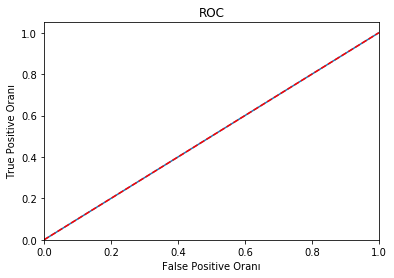

In [45]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [46]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
accuracy_score(y_test, loj_model.predict(X_test))

0.9395666666666667

In [48]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9423333333333334

<a id='7.2'></a><br>
### K-Nearest Neighbor

KNN, Denetimli Öğrenmede sınıflandırma ve regresyon için kullanılan algoritmalardan biridir. En basit makine öğrenmesi algoritması olarak kabul edilir.

In [49]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
y_pred = knn_model.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.9998

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14969
           1       1.00      1.00      1.00     15031

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



### Model Tuning

In [53]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [54]:
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.9997714285714286
En iyi parametreler: {'n_neighbors': 1}


In [56]:
knn = KNeighborsClassifier(1)
knn_tuned = knn.fit(X_train, y_train)

In [57]:
knn_tuned.score(X_test, y_test)

0.9998666666666667

In [58]:
y_pred = knn_tuned.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred)

0.9998666666666667

<a id='7.3'></a><br>
### Gaussian Naive Bayes

Değişkenin, bir sınıfa ait olup olmama olasılığı ile sınıflandırma yapar.

In [60]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [61]:
nb_model.predict(X_test)[0:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [62]:
nb_model.predict_proba(X_test)[0:10]

array([[2.75190581e-01, 7.24809419e-01],
       [2.89318609e-03, 9.97106814e-01],
       [7.16649810e-01, 2.83350190e-01],
       [1.39305757e-01, 8.60694243e-01],
       [2.62958781e-04, 9.99737041e-01],
       [1.07709904e-01, 8.92290096e-01],
       [1.59394942e-02, 9.84060506e-01],
       [3.30592530e-01, 6.69407470e-01],
       [4.78046094e-01, 5.21953906e-01],
       [1.53274869e-01, 8.46725131e-01]])

In [63]:
y_pred = nb_model.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.6968

In [65]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.6973333333333332

<a id='7.4'></a><br>
### Support Vector Machine

İki sınıf arasındaki ayrımın optimum olmasını sağlayacak hiper-düzlemi bulur.

In [66]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [67]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
y_pred = svm_model.predict(X_test)

In [69]:
accuracy_score(y_test, y_pred)

0.9476

### Model Tuning

In [70]:
svc_params = {"C": np.arange(1,2)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  3.4min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1, param_grid={'C': array([1])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [71]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}


In [72]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

In [73]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9476

<a id='7.5'></a><br>
### RBF SVC

Kerneli radius bases function olarak ayarlanmış destek vektör makinesidir.

In [74]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [75]:
svc_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9974333333333333

### Model Tuning

In [77]:
svc_params = {"C": [1],
             "gamma": [0.0001]}

In [78]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  5.8min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  8.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.0001]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=2)

In [79]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1, 'gamma': 0.0001}


In [80]:
svc_tuned = SVC(C = 1, gamma = 0.0001).fit(X_train, y_train)

In [81]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8746333333333334

<a id='7.6'></a><br>
### Decision Tree (CART)

In [82]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

(((((((1 if x[15] <= -0.244587991386652 else 0 if x[8] <= 
    -0.447426438331604 else 1) if x[0] <= -1.4758076667785645 else 1) if x[
    21] <= 2.2579352855682373 else 0) if x[3] <= -0.8282589316368103 else (
    1 if x[11] <= -0.981670469045639 else 1 if x[15] <= -0.605938732624054 else
    (1 if x[2] <= -1.208755910396576 else 0) if x[5] <= 
    -0.013440780341625214 else 1) if x[10] <= -0.3208051472902298 else (1 if
    x[2] <= 0.764131024479866 else 0 if x[5] <= -0.013440780341625214 else 
    1) if x[7] <= -0.6583010852336884 else 1) if x[14] <= 
    0.18945106118917465 else 0 if x[3] <= -0.6296712458133698 else 1) if x[
    8] <= 0.22738560289144516 else 0 if x[5] <= -0.02407647669315338 else 1
    ) if x[3] <= -0.5986351370811462 else (1 if x[3] <= 1.0076463222503662 else
    ((0 if x[15] <= 0.9345565140247345 else 1) if x[14] <= 
    0.46985122561454773 else 0 if x[11] <= 2.157755970954895 else 0 if x[18
    ] <= 0.4130617678165436 else 1) if x[11] <= 2.4190057516098022 else 

In [84]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### Model Tuning

In [85]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [86]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  3.8min finished


In [87]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'min_samples_split': 2}


In [88]:
cart = tree.DecisionTreeClassifier(max_depth = 8, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)

In [89]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9999666666666667

<a id='7.7'></a><br>
### Random Forests

In [90]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### Model Tuning

In [92]:
rf_params = {"max_depth": [8],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [93]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [94]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 31.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [95]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}


In [96]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 8, 
                                  min_samples_split = 2,
                                  n_estimators = 500)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [98]:
X_train_ = pd.DataFrame(X_train)
X_train_.columns

RangeIndex(start=0, stop=22, step=1)

In [99]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},index = X_train_.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

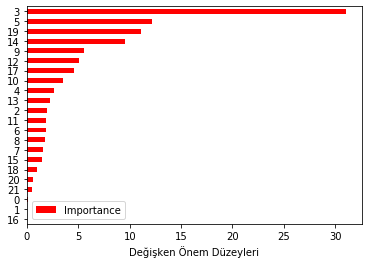

In [100]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

<a id='7.8'></a><br>
### Gradient Boosting Machines

In [101]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [102]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9999666666666667

### Model Tuning

In [103]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [104]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [105]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 75.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 135.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 188.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 199.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [106]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500}


In [111]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split =2 ,
                                n_estimators = 500)

In [113]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [114]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9999666666666667

<a id='7.9'></a><br>
### XGBoost

In [116]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [117]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### Model Tuning

In [119]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [120]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [121]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 77.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 124.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 184.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 262.8min


KeyboardInterrupt: 

In [ ]:
xgb_cv_model.best_params_

In [122]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [123]:
xgb_tuned =  xgb.fit(X_train,y_train)

[08:08:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [124]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9979

<a id='7.10'></a><br>
### LightGBM

In [59]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [60]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### Model Tuning

In [21]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [1,2],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [1,2,3,4]}

In [22]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [23]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed: 55.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'ma

In [24]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 1,
 'min_child_samples': 1,
 'n_estimators': 2000,
 'subsample': 0.6}

In [25]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 1,
                       subsample = 0.6,
                       n_estimators = 2000,
                       min_child_samples = 1)

In [26]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [27]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9700333333333333

<a id='7.11'></a><br>
### CatBoost

In [61]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.063211
0:	learn: 0.5502086	total: 90.2ms	remaining: 1m 30s
1:	learn: 0.4290086	total: 109ms	remaining: 54.5s
2:	learn: 0.3369112	total: 124ms	remaining: 41.3s
3:	learn: 0.2713860	total: 139ms	remaining: 34.5s
4:	learn: 0.2110119	total: 154ms	remaining: 30.6s
5:	learn: 0.1722177	total: 168ms	remaining: 27.9s
6:	learn: 0.1443948	total: 183ms	remaining: 25.9s
7:	learn: 0.1213974	total: 197ms	remaining: 24.4s
8:	learn: 0.1000173	total: 211ms	remaining: 23.2s
9:	learn: 0.0831235	total: 225ms	remaining: 22.3s
10:	learn: 0.0767508	total: 242ms	remaining: 21.8s
11:	learn: 0.0652975	total: 256ms	remaining: 21.1s
12:	learn: 0.0579735	total: 271ms	remaining: 20.6s
13:	learn: 0.0528423	total: 285ms	remaining: 20.1s
14:	learn: 0.0460788	total: 304ms	remaining: 20s
15:	learn: 0.0417336	total: 322ms	remaining: 19.8s
16:	learn: 0.0368739	total: 338ms	remaining: 19.5s
17:	learn: 0.0344575	total: 352ms	remaining: 19.2s
18:	learn: 0.0324252	total: 368ms	remaining: 19s
19:	learn: 0.

In [62]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## Model Tuning

In [16]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [1,2] }

In [17]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.3min finished


0:	learn: 0.6457687	total: 154ms	remaining: 1m 16s
1:	learn: 0.6061670	total: 169ms	remaining: 42.2s
2:	learn: 0.5725344	total: 184ms	remaining: 30.5s
3:	learn: 0.5439574	total: 199ms	remaining: 24.6s
4:	learn: 0.5032603	total: 214ms	remaining: 21.1s
5:	learn: 0.4572511	total: 229ms	remaining: 18.8s
6:	learn: 0.4250745	total: 245ms	remaining: 17.3s
7:	learn: 0.4069345	total: 260ms	remaining: 16s
8:	learn: 0.3940039	total: 276ms	remaining: 15.1s
9:	learn: 0.3702863	total: 291ms	remaining: 14.3s
10:	learn: 0.3540025	total: 305ms	remaining: 13.6s
11:	learn: 0.3404110	total: 332ms	remaining: 13.5s
12:	learn: 0.3276770	total: 345ms	remaining: 12.9s
13:	learn: 0.3164039	total: 365ms	remaining: 12.7s
14:	learn: 0.3055170	total: 380ms	remaining: 12.3s
15:	learn: 0.2904582	total: 397ms	remaining: 12s
16:	learn: 0.2769599	total: 413ms	remaining: 11.7s
17:	learn: 0.2716126	total: 426ms	remaining: 11.4s
18:	learn: 0.2668847	total: 442ms	remaining: 11.2s
19:	learn: 0.2575102	total: 457ms	remaining:

{'depth': 2, 'iterations': 500, 'learning_rate': 0.05}

In [18]:
catb_cv_model.best_params_

{'depth': 2, 'iterations': 500, 'learning_rate': 0.05}

In [19]:
catb = CatBoostClassifier(iterations = 500, 
                          learning_rate = 0.05, 
                          depth = 2)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6457687	total: 11.5ms	remaining: 5.72s
1:	learn: 0.6061670	total: 21.9ms	remaining: 5.45s
2:	learn: 0.5725344	total: 31.4ms	remaining: 5.21s
3:	learn: 0.5439574	total: 41.9ms	remaining: 5.2s
4:	learn: 0.5032603	total: 52ms	remaining: 5.15s
5:	learn: 0.4572511	total: 62.4ms	remaining: 5.14s
6:	learn: 0.4250745	total: 72.1ms	remaining: 5.07s
7:	learn: 0.4069345	total: 82.5ms	remaining: 5.07s
8:	learn: 0.3940039	total: 92.6ms	remaining: 5.05s
9:	learn: 0.3702863	total: 102ms	remaining: 5.01s
10:	learn: 0.3540025	total: 111ms	remaining: 4.95s
11:	learn: 0.3404110	total: 120ms	remaining: 4.9s
12:	learn: 0.3276770	total: 129ms	remaining: 4.83s
13:	learn: 0.3164039	total: 139ms	remaining: 4.81s
14:	learn: 0.3055170	total: 148ms	remaining: 4.77s
15:	learn: 0.2904582	total: 158ms	remaining: 4.78s
16:	learn: 0.2769599	total: 168ms	remaining: 4.77s
17:	learn: 0.2716126	total: 176ms	remaining: 4.71s
18:	learn: 0.2668847	total: 184ms	remaining: 4.66s
19:	learn: 0.2575102	total: 194ms	re

In [20]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

<a id='8'></a><br>
## Results

In [125]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 99.9867%
----------------------------
LogisticRegression:
Accuracy: 93.9567%
----------------------------
SVC:
Accuracy: 87.4633%
----------------------------
GaussianNB:
Accuracy: 69.6800%
----------------------------
DecisionTreeClassifier:
Accuracy: 99.9967%
----------------------------
RandomForestClassifier:
Accuracy: 100.0000%
----------------------------
GradientBoostingClassifier:
Accuracy: 99.6733%
----------------------------
CatBoostClassifier:
Accuracy: 100.0000%
----------------------------
LGBMClassifier:
Accuracy: 97.0033%
----------------------------
XGBClassifier:
Accuracy: 99.7900%


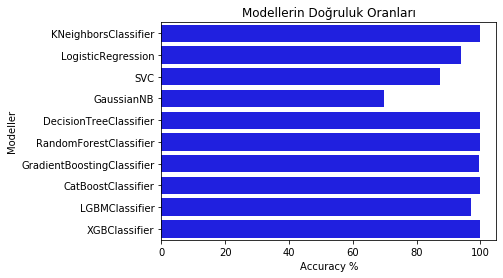

In [127]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="b")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    